In [217]:
import Magnitudes
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
from matplotlib.mlab import griddata
from scipy.stats import norm
import sfdmap
from scipy import stats
from matplotlib.font_manager import FontProperties
try:
    import valuefile
except SyntaxError:
    pass

In [193]:
fullMag = valuefile.fullMagastro1304
fullPeriod = valuefile.fullPeriodastro1304

In [194]:
name = ['astro','minion','minionOC','panstars','baseline']
number = ['1322','1304','3311','630','1929'] # '169']
attribute = ['fullSigLevel','fullmeasuredPeriod','fullMag']

string0 = 'sigLevels = [' 
string1 = 'measuredPeriods = [' 
string2 = 'fullRed = [' 

for x,na in enumerate(name):
    for y,nu in enumerate(number):
        string0 += ('valuefile.'+attribute[0]+na+nu+',')
        string1 += ('valuefile.'+attribute[1]+na+nu+',')
        string2 += ('valuefile.'+attribute[2]+na+nu+',')

string0 = string1[:-1]+']'
string1 = string1[:-1]+']'
string2 = string2[:-1]+']'


In [195]:
measuredPeriods = [valuefile.fullmeasuredPeriodastro1322,valuefile.fullmeasuredPeriodastro1304,valuefile.fullmeasuredPeriodastro3311,valuefile.fullmeasuredPeriodastro630,valuefile.fullmeasuredPeriodastro1929,valuefile.fullmeasuredPeriodminion1322,valuefile.fullmeasuredPeriodminion1304,valuefile.fullmeasuredPeriodminion3311,valuefile.fullmeasuredPeriodminion630,valuefile.fullmeasuredPeriodminion1929,valuefile.fullmeasuredPeriodminionOC1322,valuefile.fullmeasuredPeriodminionOC1304,valuefile.fullmeasuredPeriodminionOC3311,valuefile.fullmeasuredPeriodminionOC630,valuefile.fullmeasuredPeriodminionOC1929,valuefile.fullmeasuredPeriodpanstars1322,valuefile.fullmeasuredPeriodpanstars1304,valuefile.fullmeasuredPeriodpanstars3311,valuefile.fullmeasuredPeriodpanstars630,valuefile.fullmeasuredPeriodpanstars1929,valuefile.fullmeasuredPeriodbaseline1322,valuefile.fullmeasuredPeriodbaseline1304,valuefile.fullmeasuredPeriodbaseline3311,valuefile.fullmeasuredPeriodbaseline630,valuefile.fullmeasuredPeriodbaseline1929]

In [196]:
fullRed = [valuefile.fullMagastro1322,valuefile.fullMagastro1304,valuefile.fullMagastro3311,valuefile.fullMagastro630,valuefile.fullMagastro1929,valuefile.fullMagminion1322,valuefile.fullMagminion1304,valuefile.fullMagminion3311,valuefile.fullMagminion630,valuefile.fullMagminion1929,valuefile.fullMagminionOC1322,valuefile.fullMagminionOC1304,valuefile.fullMagminionOC3311,valuefile.fullMagminionOC630,valuefile.fullMagminionOC1929,valuefile.fullMagpanstars1322,valuefile.fullMagpanstars1304,valuefile.fullMagpanstars3311,valuefile.fullMagpanstars630,valuefile.fullMagpanstars1929,valuefile.fullMagbaseline1322,valuefile.fullMagbaseline1304,valuefile.fullMagbaseline3311,valuefile.fullMagbaseline630,valuefile.fullMagbaseline1929]

In [197]:
sigLevels = [valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929,valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929,valuefile.fullSigLevelminionOC1322,valuefile.fullSigLevelminionOC1304,valuefile.fullSigLevelminionOC3311,valuefile.fullSigLevelminionOC630,valuefile.fullSigLevelminionOC1929,valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929,valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]

In [198]:
count = 0
othercount = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0
bigSig = 0
for x in range(len(measuredPeriods)):
    for y in range(0,len(fullPeriod)):
        for z in range(0, len(fullPeriod[0])):
            #print([x],[y],[z])
            if measuredPeriods[x][y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and measuredPeriods[x][y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
                donothing = 0
                othercount += 1
                if y == 0:
                    seventeenth += 1
                if y == (len(fullPeriod)-1):
                    twentyfour += 1
                if z == 0:
                    lowPeriod += 1
                if z == len(fullPeriod[0]) - 1:
                    highPeriod += 1
                if sigLevels[x][y][z] == 1.0:
                    bigSig += 1
            else: 
                sigLevels[x][y][z] = 0
                count += 1

In [199]:
name = ['astro','minion','minionOC','panstars','baseline']
number = ['1322','1304','3311','630','1929'] # '169']
attribute = ['fullSigLevel','fullmeasuredPeriod']
string1 = 'sigLevels = [' 
string2 = 'measuredPeriods = [' 

for x,na in enumerate(name):
    string1 += '['
    string2 += '['
    for y,nu in enumerate(number):
        string1 += ('valuefile.'+attribute[0]+na+nu+',')
        string2 += ('valuefile.'+attribute[1]+na+nu+',')
    string1 = string1[:-1]+'],'
    string2 = string2[:-1]+'],'
string1 = string1[:-2]+']]'
string2 = string2[:-2]+']]'

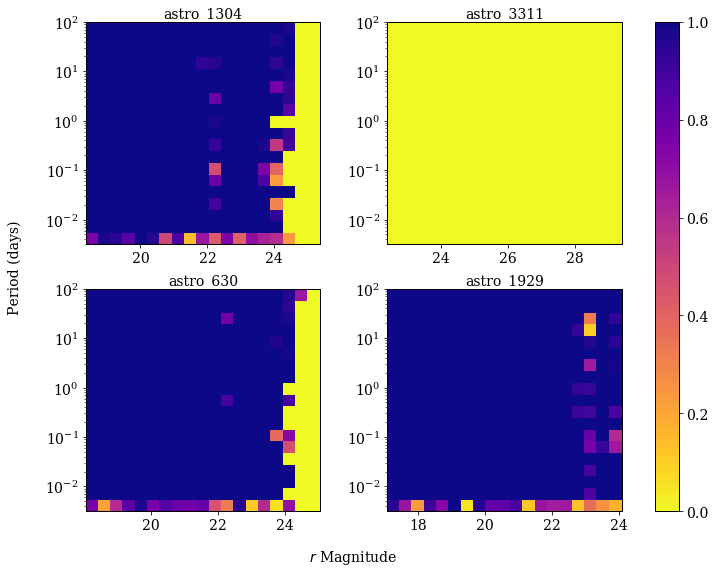

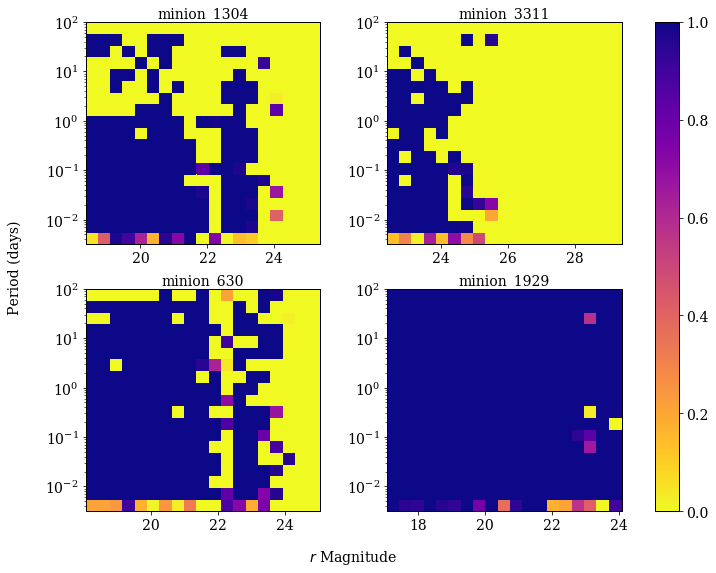

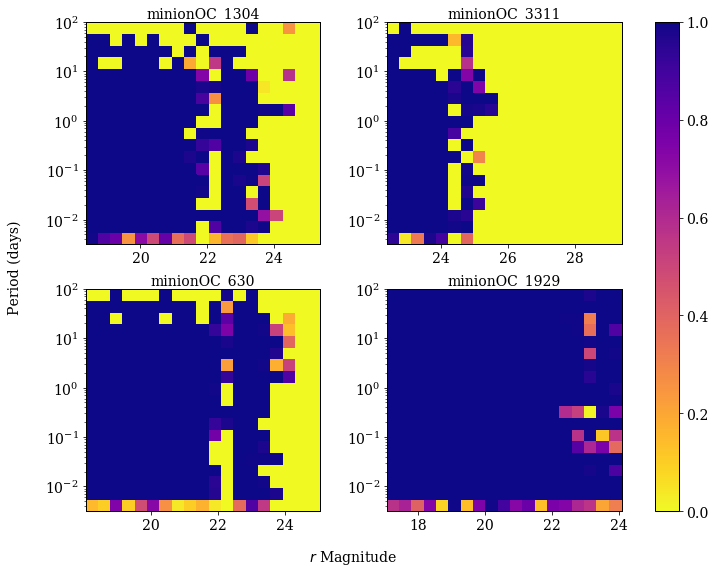

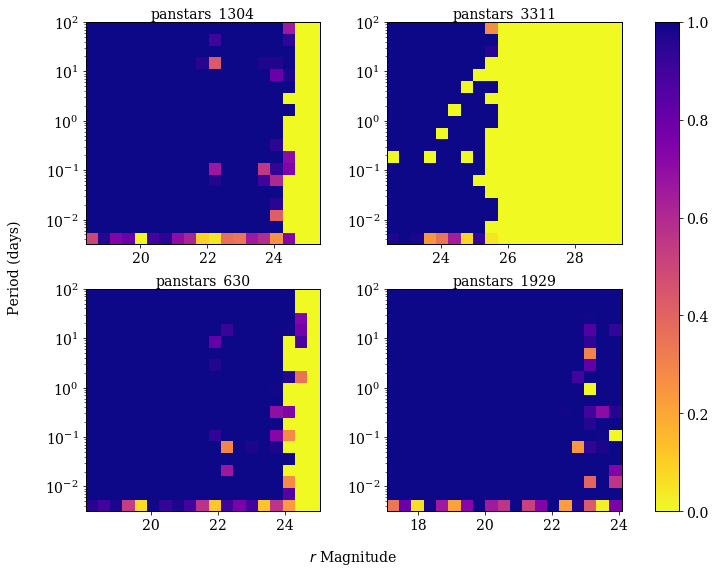

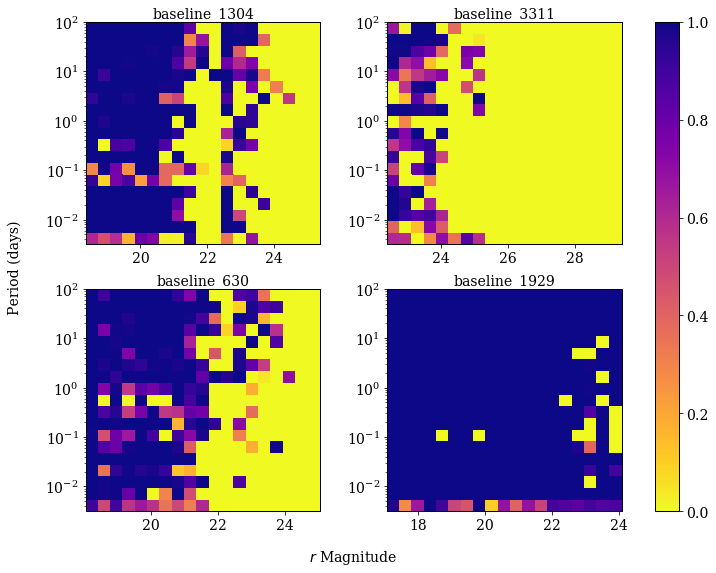

In [200]:
import matplotlib.gridspec as gridspec

#name = ['minion','minionOC','astro','panstars']
name = ['astro','minion','minionOC','panstars','baseline']
number = ['1322','1304','3311','630','1929'] # '169']

for x in range(len(name)):
    fig = plt.figure(figsize=(12,9))
    font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}


    gs=gridspec.GridSpec(2,2000)

    plt.rc('axes',linewidth=0)
    ydis = 1.07
    fakeaxis=fig.add_subplot(gs[:,:])
    fakeaxis.set_yticks([])
    fakeaxis.set_xticks([])

    ax_list = fig.axes

    plt.rc('font', **font)
    plt.rc('axes',linewidth=1)

    p1=fig.add_subplot(gs[0,0:700])
    im = p1.pcolor(fullRed[(x*len(name))+1],fullPeriod,sigLevels[(x*len(name))+1],cmap='plasma_r',vmin=0,vmax=1)
    p1.set_yscale('log')
    p1.set_ylabel(name[x]+'_'+number[1],rotation=0,va="top")
    p1.yaxis.set_label_coords(0.5,ydis)

    p2=fig.add_subplot(gs[0,900:1600])
    im = p2.pcolor(fullRed[(x*len(name))+2],fullPeriod,sigLevels[(x*len(name))+2],cmap='plasma_r',vmin=0,vmax=1)
    p2.set_yscale('log')
    p2.set_ylabel(name[x]+'_'+number[2],rotation=0,va="top")
    p2.yaxis.set_label_coords(0.5,ydis)

    p3=fig.add_subplot(gs[1,0:700])
    im = p3.pcolor(fullRed[(x*len(name))+3],fullPeriod,sigLevels[(x*len(name))+3],cmap='plasma_r',vmin=0,vmax=1)
    p3.set_yscale('log')
    p3.set_ylabel(name[x]+'_'+number[3],rotation=0,va="top")
    p3.yaxis.set_label_coords(0.5,ydis)

    p4=fig.add_subplot(gs[1,900:1600])
    im = p4.pcolor(fullRed[(x*len(name))+4],fullPeriod,sigLevels[(x*len(name))+4],cmap='plasma_r',vmin=0,vmax=1)
    p4.set_yscale('log')
    p4.set_ylabel(name[x]+'_'+number[4],rotation=0,va="top")
    p4.yaxis.set_label_coords(0.5,ydis)

    print ax_list

    #fig.colorbar(im, ax=ax.ravel().tolist())
    plt.sca(fakeaxis)
    plt.colorbar(im)
    fakeaxis.set_xlabel('$\it{r}$ Magnitude')
    fakeaxis.set_ylabel('Period (days)',labelpad=20)
    fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
    #fakeaxis.set_label_coords(0.5,-0.1)
    #label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
    fakeaxis.xaxis.set_label_coords(0.5, -0.075)

    plt.show()

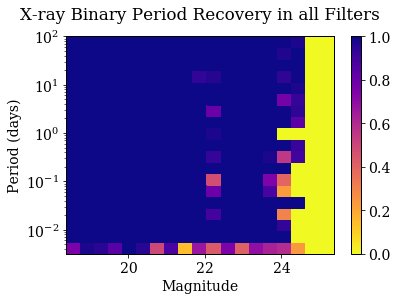

In [201]:
#%matplotlib

FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,sigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')

plt.show()


In [202]:
sigLevels = [[valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929],[valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929],[valuefile.fullSigLevelminionOC1322,valuefile.fullSigLevelminionOC1304,valuefile.fullSigLevelminionOC3311,valuefile.fullSigLevelminionOC630,valuefile.fullSigLevelminionOC1929],[valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929],[valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]]

In [203]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*4
    for z in range(1,len(sigLevels[strat])):
        siglist = []
        for x in range(20):
            sigval = 0.
            for y in range(20):
                sigval += sigLevels[strat][z][x][y]
                #print(sigval,y)
            sigval = sigval/(y+1)
            siglist.append(sigval)
        newav[z-1] = siglist
    averageSigLevels.append(newav)

#print(averageSigLevels)

[[0.65259, 0.62126, 0.6989150000000001, 0.69477, 0.5811550000000001, 0.7585200000000001, 0.797495, 0.636235, 0.39966, 0.289995, 0.1365, 0.650205, 0.75576, 0.503105, 0.094915, 0.097235, 0.0, 0.0, 0.0, 0.0], [0.65691, 0.665105, 0.651, 0.6319549999999999, 0.557055, 0.283195, 0.410535, 0.07091, 0.094165, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.8606999999999999, 0.810615, 0.86202, 0.9452400000000001, 0.90869, 0.90073, 0.96219, 0.751285, 0.86631, 0.8478449999999998, 0.480795, 0.221855, 0.83604, 0.659335, 0.66344, 0.378995, 0.048905, 0.0, 0.0, 0.0], [0.999455, 0.997475, 0.9971650000000001, 1.0, 0.9981099999999999, 0.99681, 1.0, 0.9885349999999999, 0.9998250000000001, 0.9684699999999999, 0.9971499999999999, 0.9999500000000001, 1.0, 0.9586349999999999, 0.960435, 0.9757100000000001, 0.876205, 0.9499000000000001, 0.9443950000000001, 0.710845]]


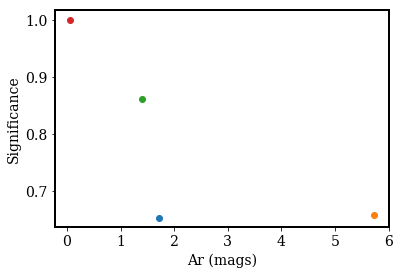

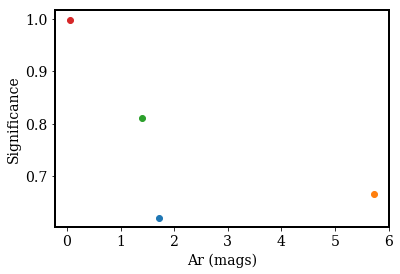

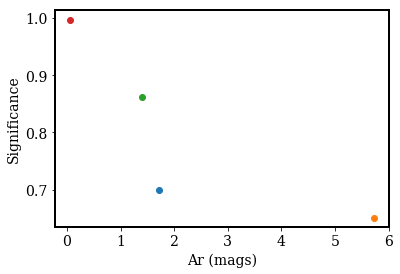

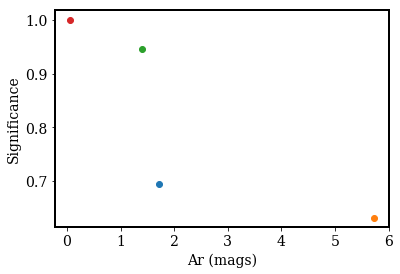

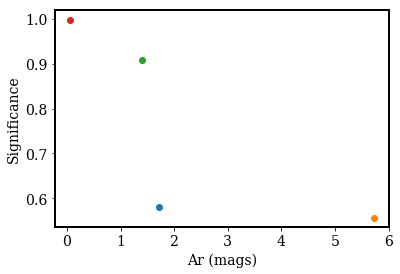

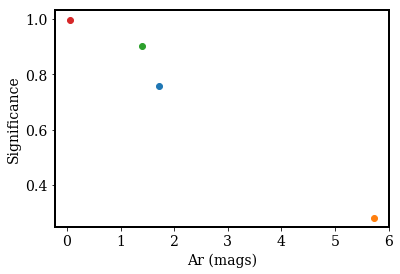

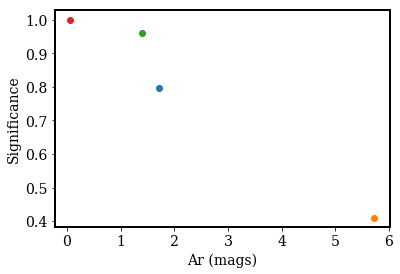

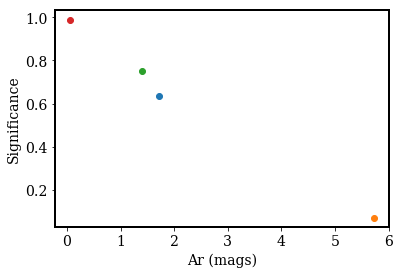

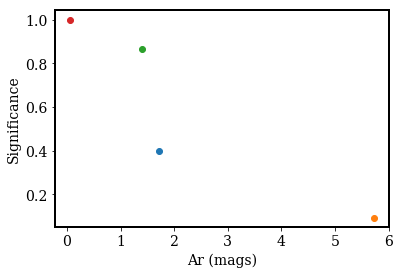

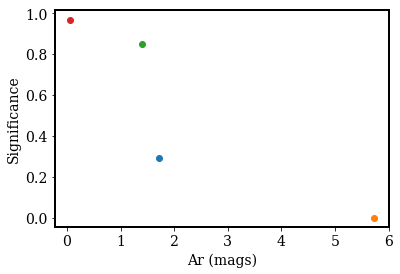

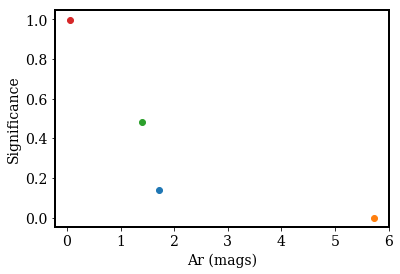

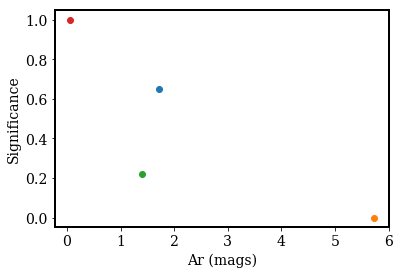

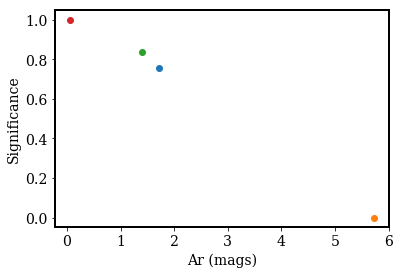

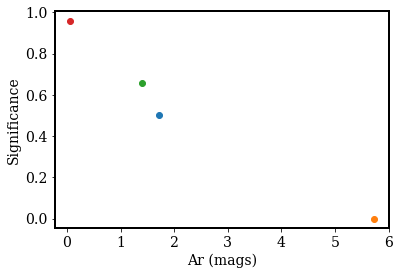

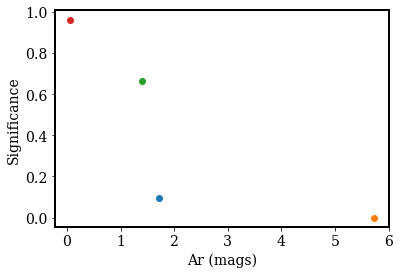

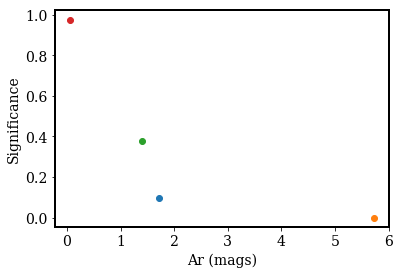

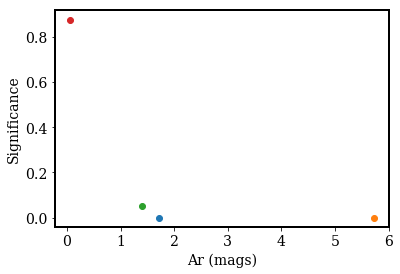

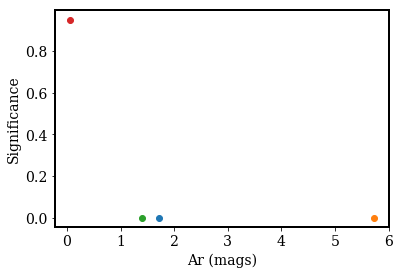

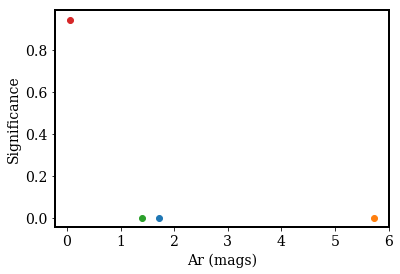

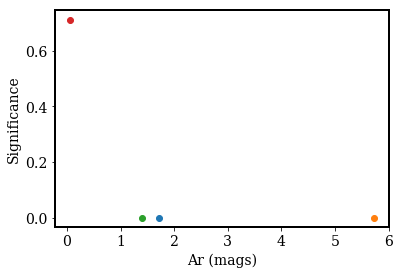

In [204]:
astrosigLevel = averageSigLevels[1]
print(astrosigLevel)
# astro1304,astro3311,astro630,astro1929
# 1.719 5.73 1.398 0.054


# 1304 1322 630 169 1929 3311
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]
for x in range(len(astrosigLevel[0])):
    for y in range(len(astrosigLevel)):
        plt.plot(Ar[y],astrosigLevel[y][x],'o')
        
    plt.xlabel('Ar (mags)')
    plt.ylabel('Significance')
    plt.show()

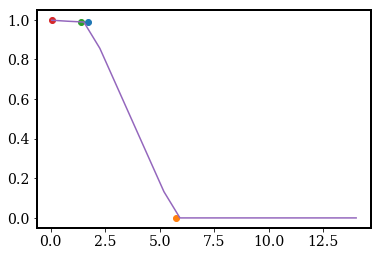

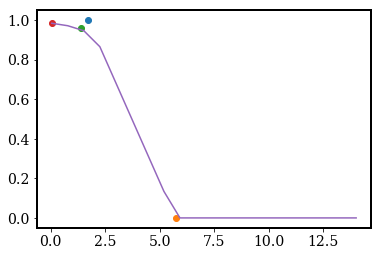

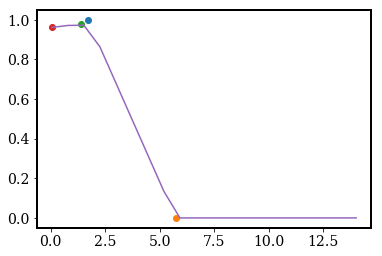

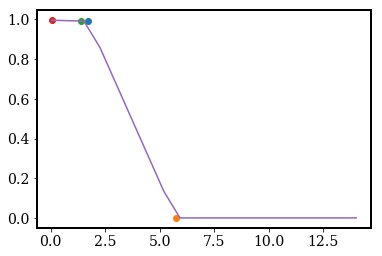

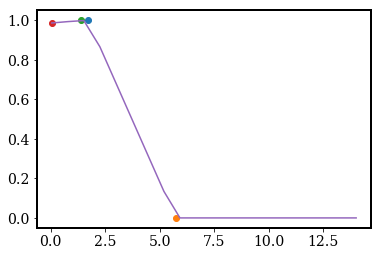

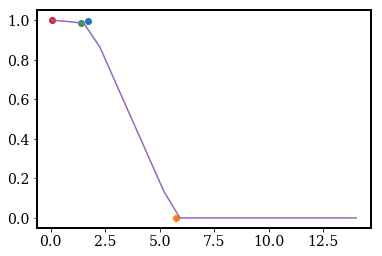

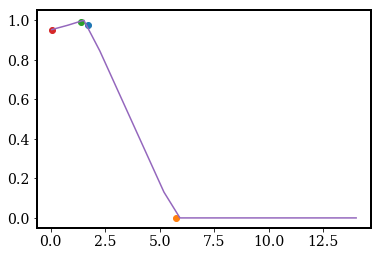

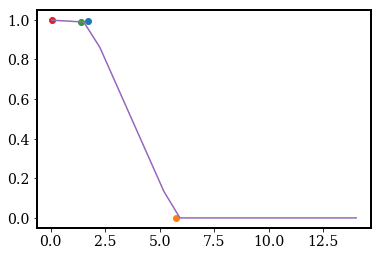

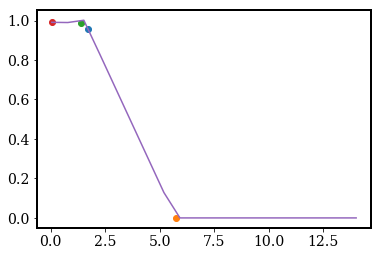

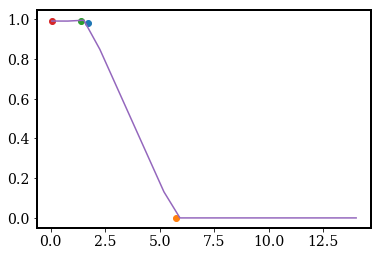

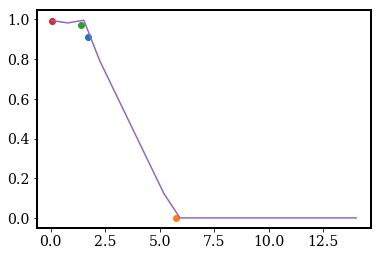

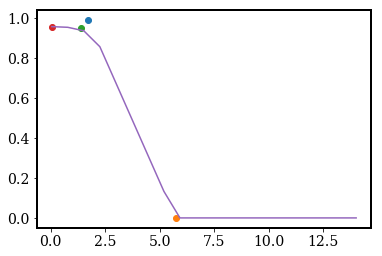

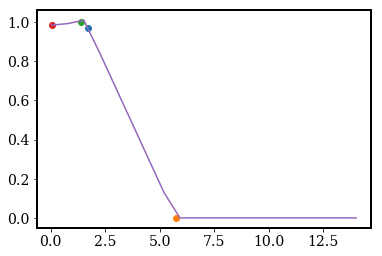

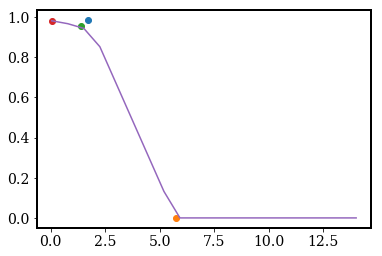

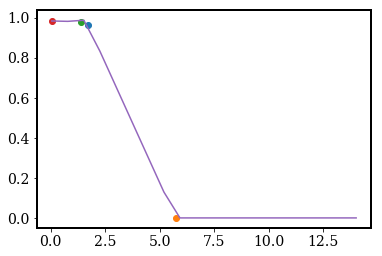

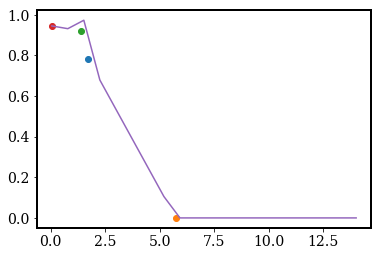

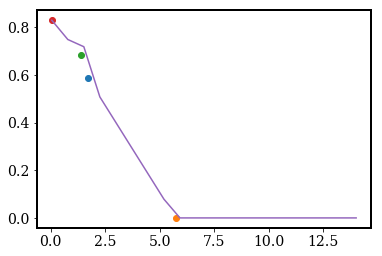

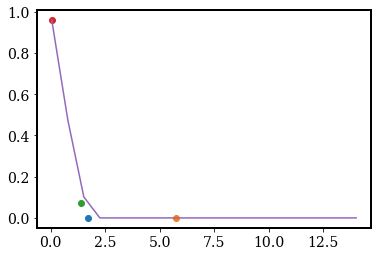

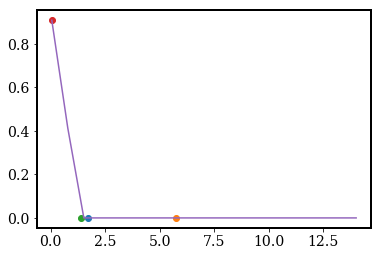

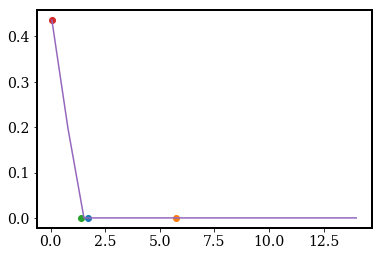

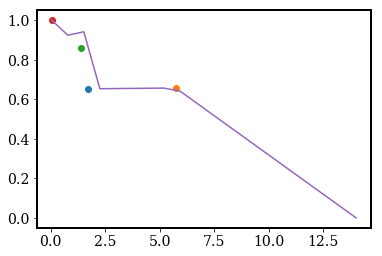

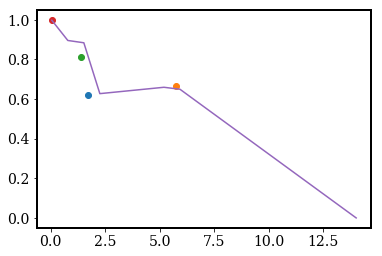

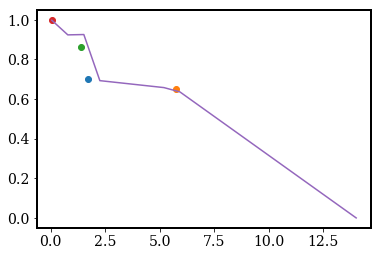

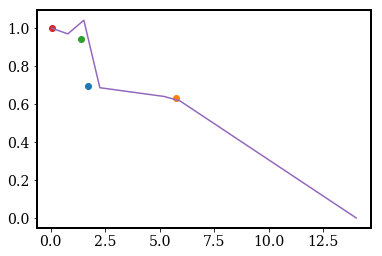

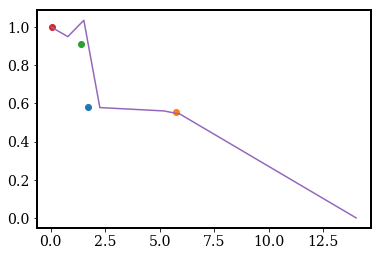

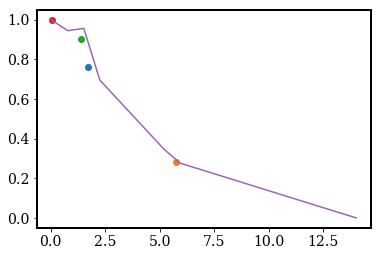

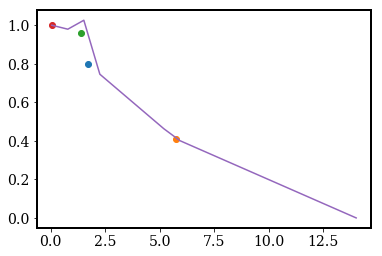

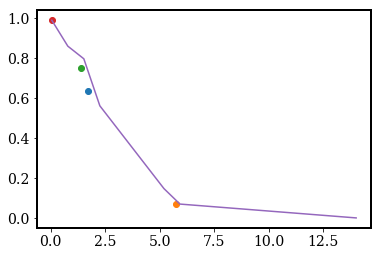

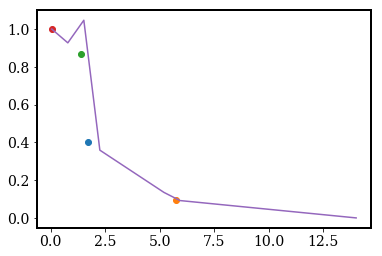

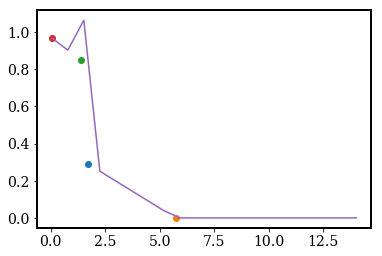

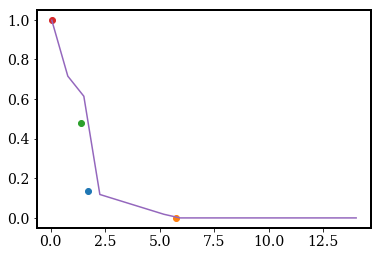

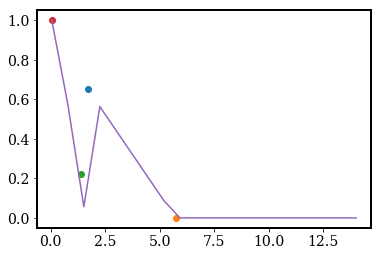

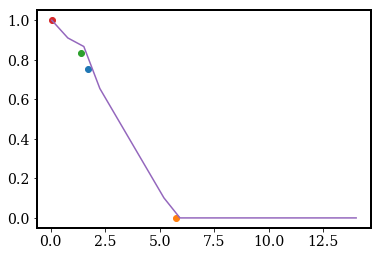

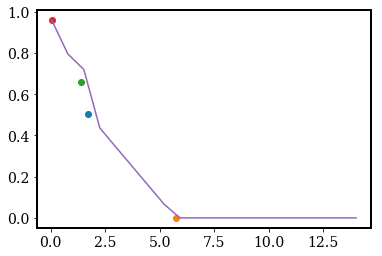

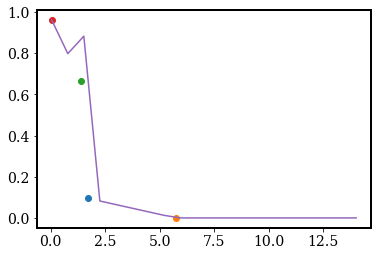

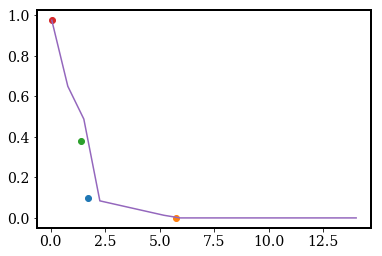

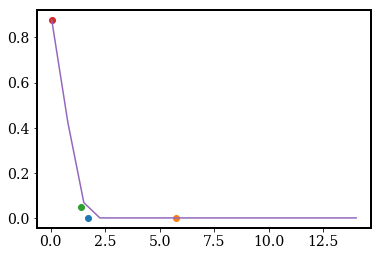

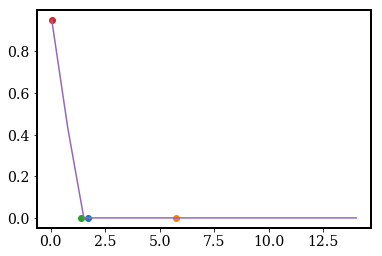

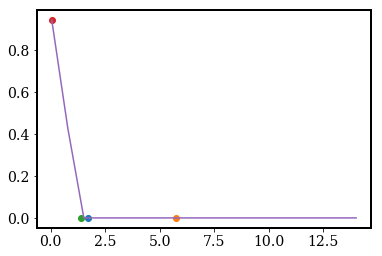

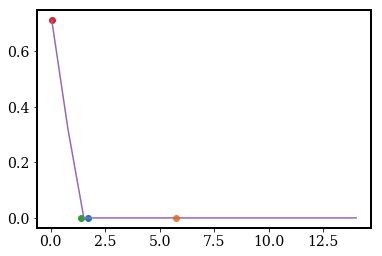

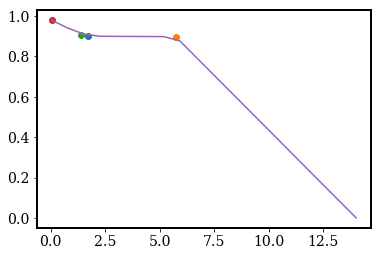

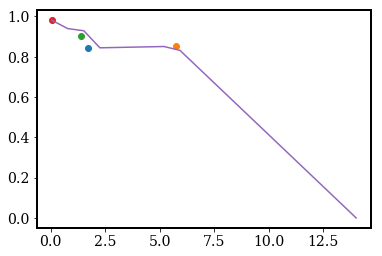

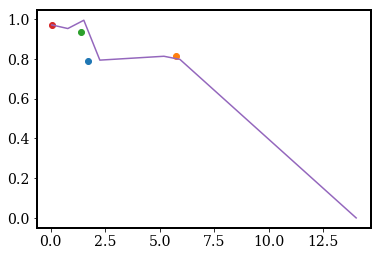

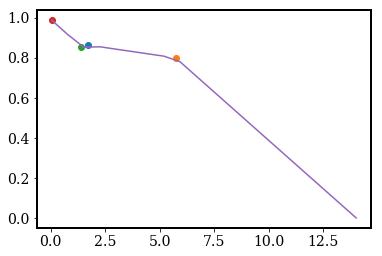

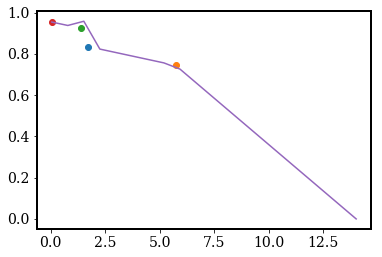

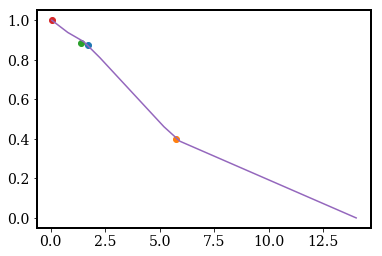

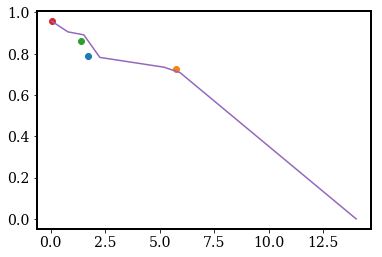

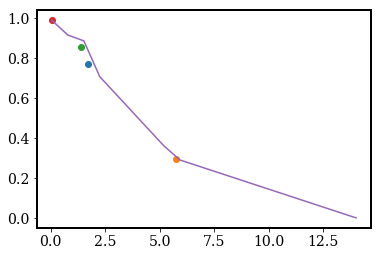

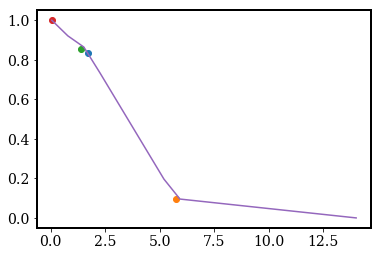

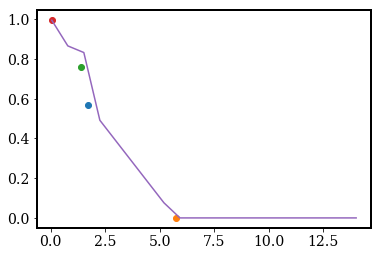

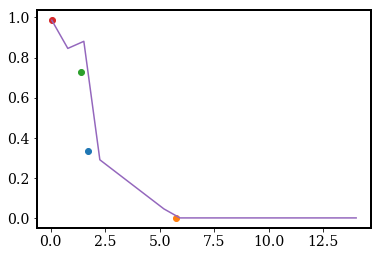

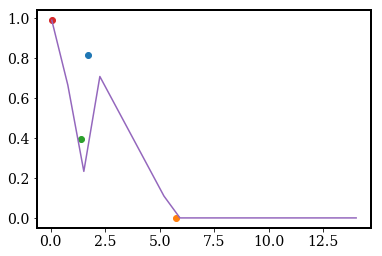

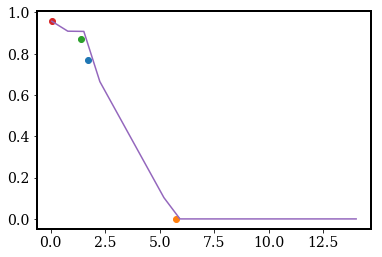

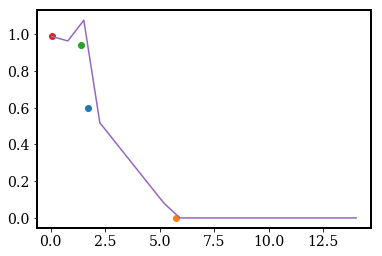

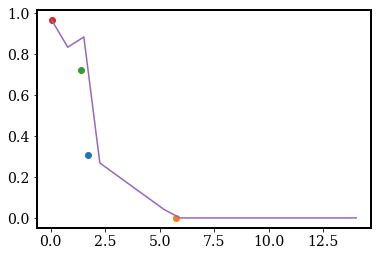

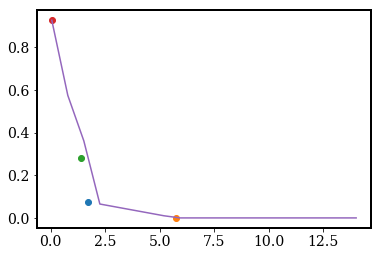

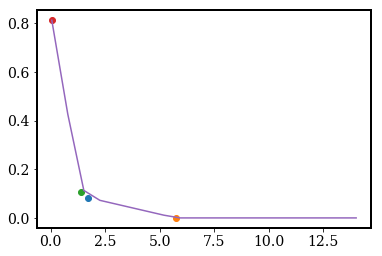

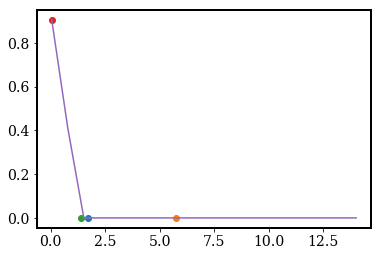

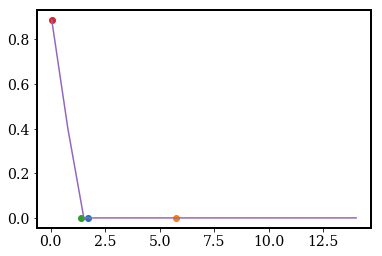

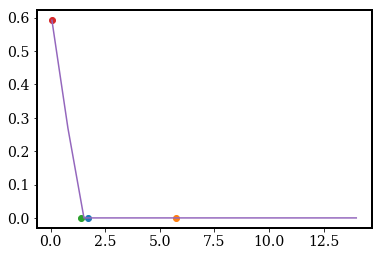

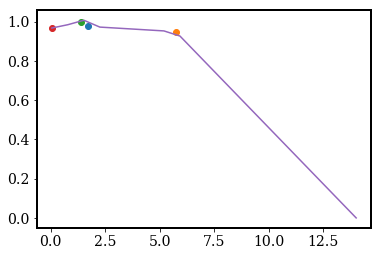

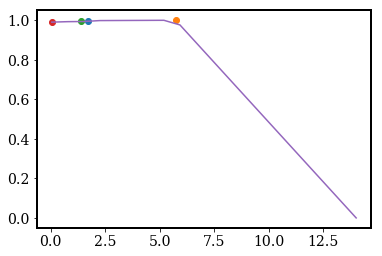

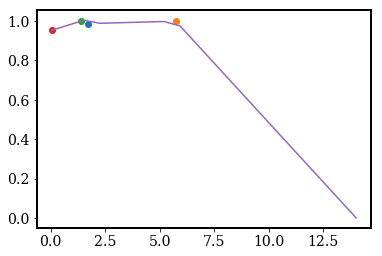

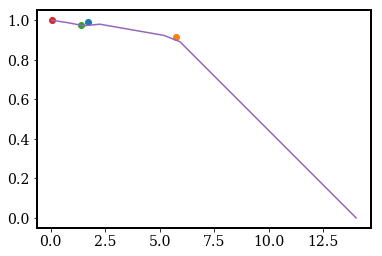

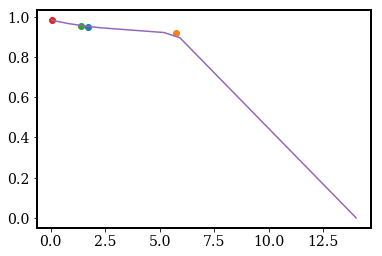

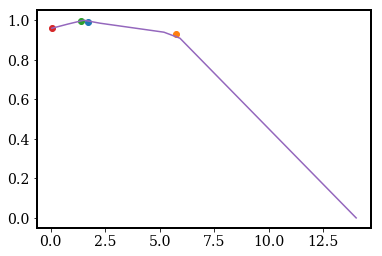

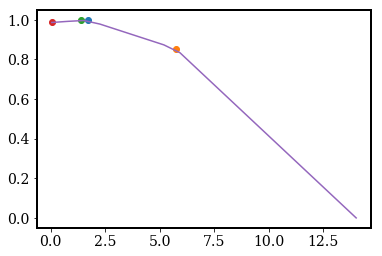

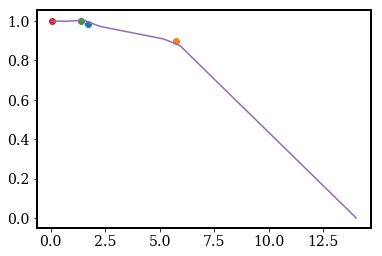

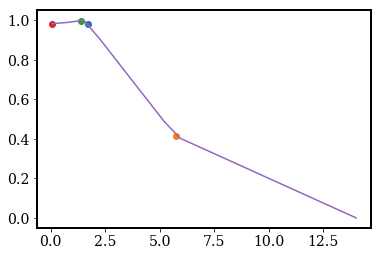

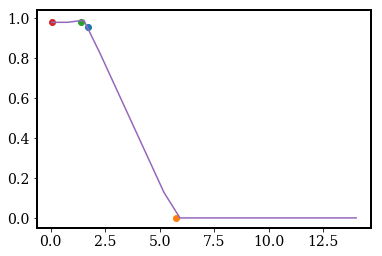

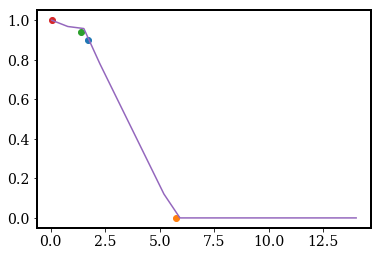

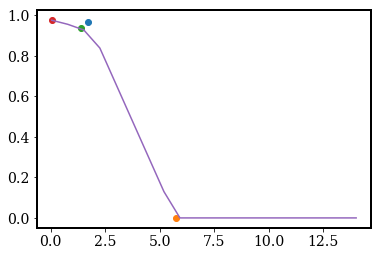

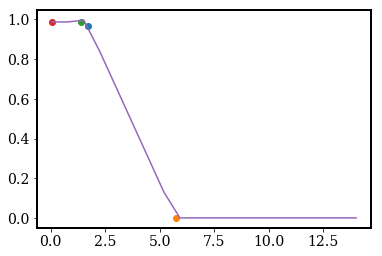

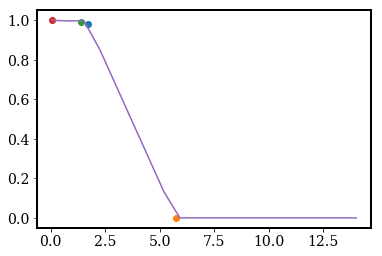

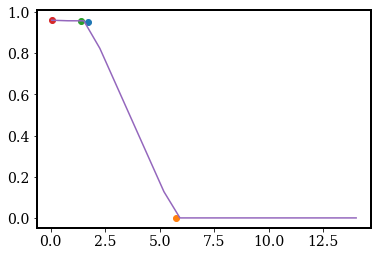

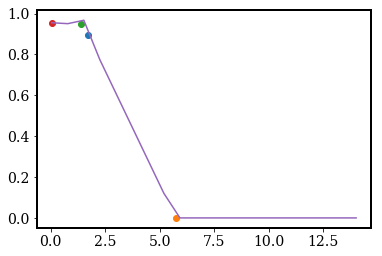

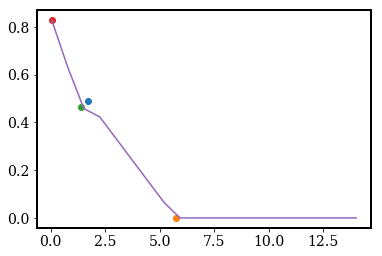

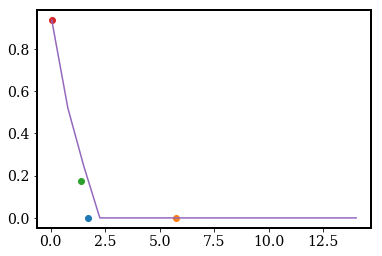

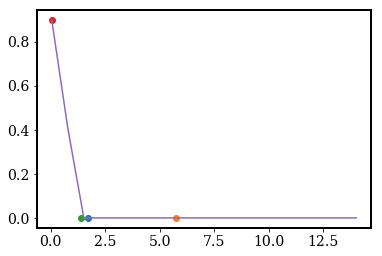

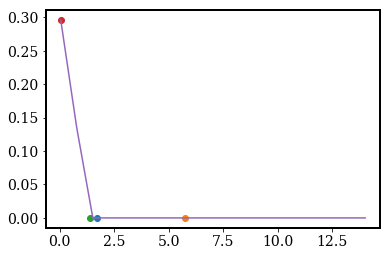

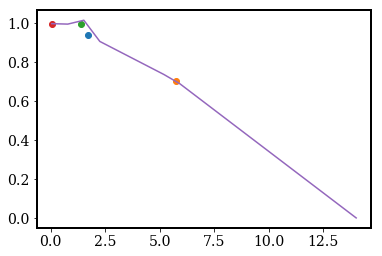

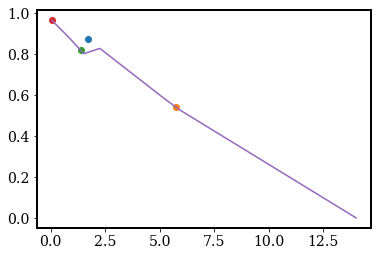

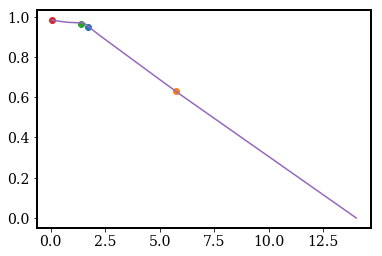

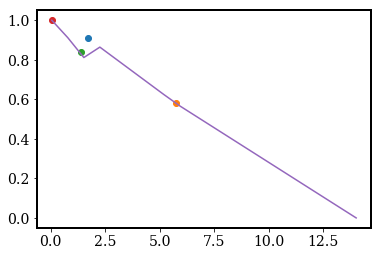

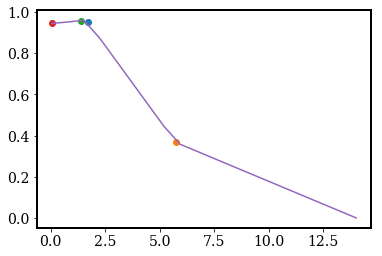

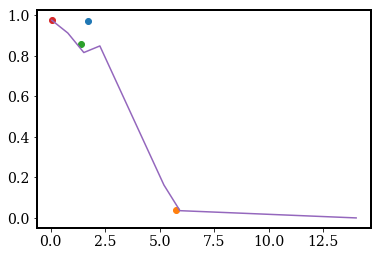

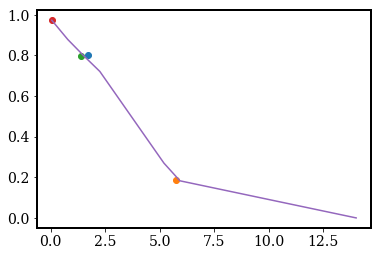

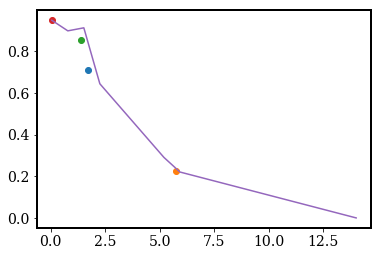

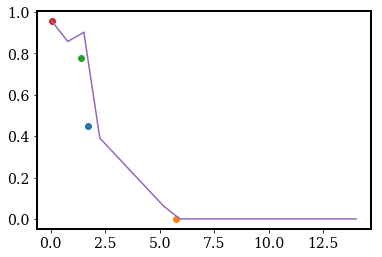

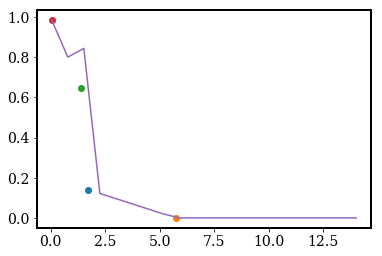

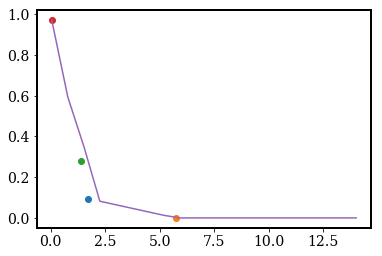

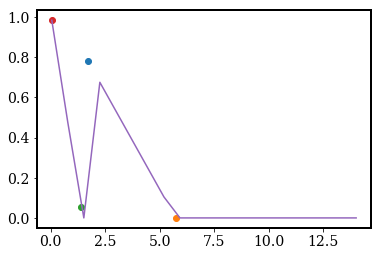

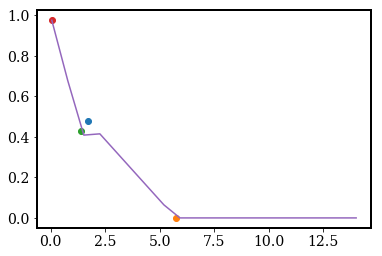

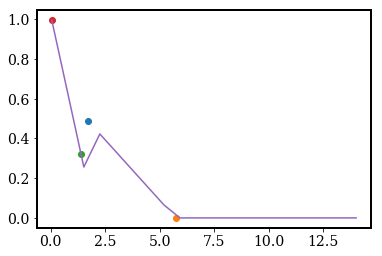

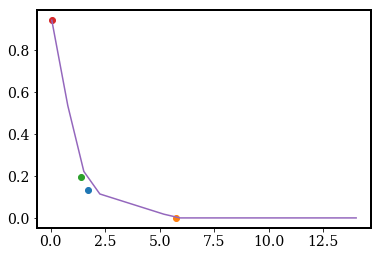

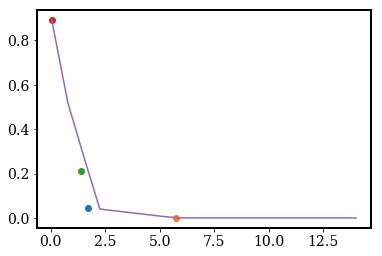

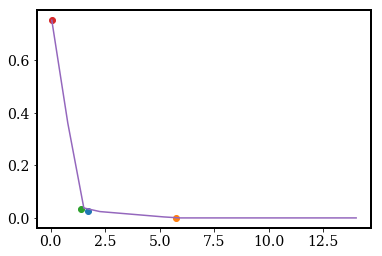

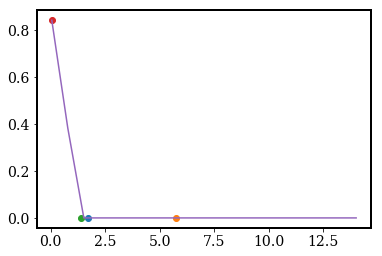

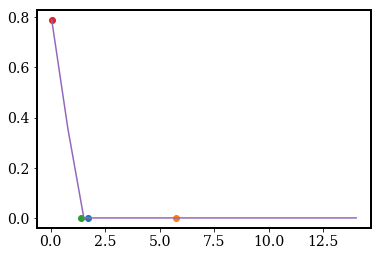

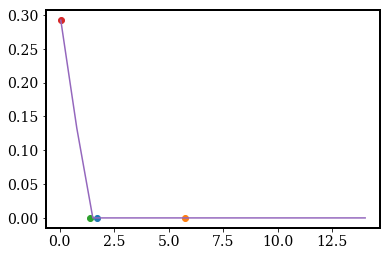

In [205]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]

reddening = np.linspace(0.054,14,20)

fullSigLevelsRedPeriod = []
fullSigRedMag = []

for strat in range(len(averageSigLevels)):
    astrosigLevel = averageSigLevels[strat]
    reformat = [[]]*len(reddening)
    finalsig = []
    for i,item in enumerate(reddening):
        sig = []
        if item >= Ar[3] and item < Ar[2]:
            Y = [a-b for a,b in zip(astrosigLevel[2],astrosigLevel[3])]
            X = Ar[2]-Ar[3]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3],m)]
        elif item >= Ar[2] and item < Ar[0]:
            Y = [a-b for a,b in zip(astrosigLevel[0],astrosigLevel[2])]
            X = Ar[2]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2],m)]
        elif item >= Ar[0] and item < Ar[1]:
            Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[0])]
            X = Ar[1]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0],m)]
        elif item >= Ar[1]:
            Y = [-x for x in astrosigLevel[1]]
            X = 14-Ar[1]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1],m)]
        #print(sig)
        for cycle in range(len(sig)):
            if sig[cycle] < 0.:
                sig[cycle] = 0.
        #print(sig)
    #     if len(sig) != 20:
    #         print 'whoa now'
    #     for z in range(len(sig)):
    #         reformat[z][i] = sig[z]

        finalsig.append(sig)
    fullSigLevelsRedPeriod.append(finalsig)
    reformat = []
    for x in range(len(finalsig)):
        newsig = []
        for y in range(len(finalsig[x])):
            newsig.append(finalsig[y][x])
        reformat.append(newsig)
    fullSigRedMag.append(reformat)
    for x in range((20)):
        for y in range(len(astrosigLevel)):
            plt.plot(Ar[y],astrosigLevel[y][x],'o')
        plt.plot(reddening,reformat[x])
        plt.show()

In [206]:
fullRed = []
for i,item in enumerate(reddening):
    fullRed.append([item]*20)
#print(fullRed)

In [207]:
fullRed = [reddening]*20

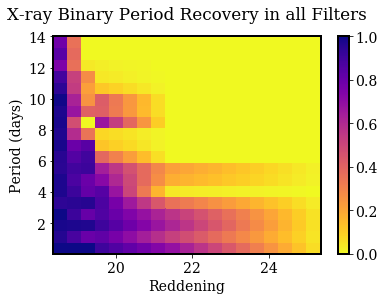

In [208]:
#%matplotlib

FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullRed,finalsig,cmap='plasma_r',vmin=0,vmax=1)
#plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Reddening')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')

plt.show()

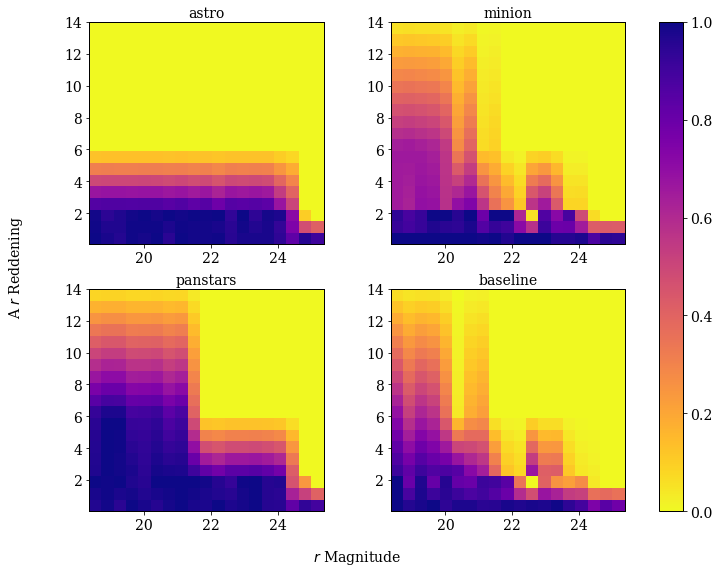

In [209]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullRed,fullSigRedMag[0],cmap='plasma_r',vmin=0,vmax=1)
#p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullRed,fullSigRedMag[1],cmap='plasma_r',vmin=0,vmax=1)
#p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullRed,fullSigRedMag[3],cmap='plasma_r',vmin=0,vmax=1)
#p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullRed,fullSigRedMag[4],cmap='plasma_r',vmin=0,vmax=1)
#p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('$\it{r}$ Magnitude',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [216]:
print((fullSigRedMag[2][0]))

[0.97862000000000005, 0.93976278273809521, 0.9105333021806854, 0.89924077412116676, 0.89883177636499623, 0.89842277860882569, 0.89801378085265526, 0.89760478309648473, 0.87603876299879091, 0.79639887545344623, 0.71675898790810155, 0.63711910036275698, 0.55747921281741242, 0.47783932527206774, 0.39819943772672312, 0.31855955018137849, 0.23891966263603392, 0.15927977509068925, 0.079639887545344679, 0.0]


In [218]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

4.2726


In [219]:
bayestar = BayestarQuery(max_samples=2)
m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')

In [226]:
def findWeight(l,b,r,rM,bayestar=bayestar,m=m):
    rogrim,rtgrim,rdgrim,rzgrim,rmgrim,gamma,bulge,disc,sphere,Rc,q = 1.,1.9,3.5,0.41,6.5,1.8,2.,1.,0.8,2.8,0.6
    milkyWayRadius = 15.
    scaleHeight = 3.5
    bSphere = 7.669
    
    magrange = np.linspace(13,20,20)
    redrange = np.linspace(0.054,14,20)
    
    ebv=[]
   
    R = 2.273
    Rd = 3 #kpc
    coords = SkyCoord(l*units.deg, b*units.deg,distance=(r*1000)*units.pc, frame='galactic')
    ebv = (bayestar(coords, mode='median'))
    string = str(ebv)
    if 'nan' in string:
        newl = l 
        while 'nan' in string:
            newl += -1
            coords = SkyCoord((newl)*units.deg, b*units.deg,distance=(r*1000)*units.pc, frame='galactic')
            ebv = (m.ebv(coords, mode='median')) # calculates reddening in galactic plane
            string = str(ebv)
            #print(string)
            
    mag = (5*np.log10((r*(1000/10)))+rM)
    reddening = ((ebv)*R)
    
    radius = r * np.cos(b)
    thickness = r * np.sin(b)
                   
    xlen = (((radius*np.cos(np.deg2rad(l)))-8))
    ylen = ((radius*np.sin(np.deg2rad(l))))
    dist = ((xlen**2)+(ylen**2))**0.5
    
    
    
    Bulge = (bulge*(((((dist**2)+((thickness**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((thickness**2)/(q**2)))/rtgrim**2)))
    Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(thickness)/rzgrim))))
    Sphere = (sphere*(np.exp(-bSphere*((r/Rc)**0.25))))/((r/Rc)**(7/8))
    bp = Bulge + Disc + Sphere
    
    print(Bulge)
    print(Disc)
    print(Sphere)
    
    magbin = -1
    redbin = -1
    for x,item in enumerate(magrange):
        if ebv <= redrange[0]:
            redbin = 0     
        if x < 19:
            if mag >= magrange[x] and mag <= magrange[x+1]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[x+1]:
                redbin = x
        else:
            if mag >= magrange[x] and mag <= magrange[19]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[19]:
                redbin = x
         
    
    results = {}
    results[0] = [xlen,ylen,thickness]
    results[1] = mag
    results[2] = magbin
    results[3] = ebv
    results[4] = redbin
    results[5] = bp
    
    return results

7.62788890624e-10
0.0359891075447
0.0285237581904
2.21596465072e-16
1.85874544919e-05
0.000250204829357
2.07195787443e-29
9.27664417639e-09
5.62887676454e-05
7.18393668363e-49
4.52904091591e-12
2.05625661958e-05
9.16929783714e-75
2.17831202391e-15
9.41575994934e-06
4.21602320652e-107
1.03659795046e-18
4.93173811307e-06
6.86676914328e-146
4.89435218669e-22
2.82736823476e-06
3.91545058072e-191
2.29720366076e-25
1.7305830785e-06
7.75228555169e-243
1.07325156509e-28
1.11345162147e-06
5.29853272236e-301
4.99595874526e-32
7.45223717849e-07
1.26355748513e-09
0.0378033804437
0.0285237581904
2.00976621645e-08
9.50820447936e-05
0.000250204829357
5.22937313148e-13
1.70672473764e-07
5.62887676454e-05
3.65450342435e-23
5.76883687901e-11
2.05625661958e-05
8.39206915715e-39
2.3101875959e-17
9.41575994934e-06
6.36580592679e-60
7.12249036977e-16
4.93173811307e-06
1.56231719395e-86
2.18447551923e-18
2.82736823476e-06
1.21906002952e-118
3.38137151687e-21
1.7305830785e-06
1.47887144181e-09
0.043085972984


7.45223717849e-07
1.01985838994e-09
0.0424584253088
0.0285237581904
2.93723429078e-10
0.00491365397813
0.000250204829357
6.493414943e-14
0.000448784401709
5.62887676454e-05
1.32759136707e-20
3.32716470198e-05
2.05625661958e-05
2.76589970823e-30
2.12668685792e-06
9.41575994934e-06
9.90144810208e-10
0.0374409891109
0.0285237581904
4.7486051819e-12
7.02355435452e-05
0.000250204829357
9.06292282148e-10
0.036235417076
0.0285237581904
7.36317680684e-14
2.34402816513e-05
0.000250204829357
1.04309184072e-09
0.0364373733726
0.0285237581904
8.61546379227e-12
2.83443148844e-05
0.000250204829357
1.67719937079e-20
2.09220354658e-08
5.62887676454e-05
1.12996175575e-35
1.46948396149e-11
2.05625661958e-05
2.81485882016e-57
9.82673523656e-15
9.41575994934e-06
2.55589296727e-85
6.24007811783e-18
4.93173811307e-06
8.29854693174e-120
3.75846662205e-21
2.82736823476e-06
9.49672771973e-161
2.15471792766e-24
1.7305830785e-06
3.79187578592e-208
1.18393806438e-27
1.11345162147e-06
5.24477588093e-262
6.28373796

2.63325490303e-16
9.41575994934e-06
5.807649102e-108
7.65294393619e-20
4.93173811307e-06
1.83200323902e-149
2.21707040799e-23
2.82736823476e-06
2.92727377273e-198
6.40494690089e-27
1.7305830785e-06
2.34731856167e-254
1.84578302645e-30
1.11345162147e-06
9.38432734302e-318
5.30759224694e-34
7.45223717849e-07
6.18508256153e-10
0.0416263343526
0.0285237581904
1.33006700747e-17
0.00255253109144
0.000250204829357
3.25056090507e-28
0.000140073754728
5.62887676454e-05
8.6761816526e-42
7.2878368875e-06
2.05625661958e-05
2.46206016894e-58
3.68220367491e-07
9.41575994934e-06
7.13068145885e-10
0.0369578396137
0.0285237581904
7.34587452212e-17
4.52485003994e-05
0.000250204829357
1.14336528173e-09
0.0365697515089
0.0285237581904
1.96752075833e-10
3.18796588973e-05
0.000250204829357
1.04309184072e-09
0.0364373733726
0.0285237581904
8.61546379227e-12
2.83443148844e-05
0.000250204829357
1.67719937079e-20
2.09220354658e-08
5.62887676454e-05
1.12996175575e-35
1.46948396149e-11
2.05625661958e-05
2.8148588

1.2500183609e-214
4.16549400761e-22
7.45223717849e-07
9.91989638217e-10
0.0355425569245
0.0285237581904
5.56644485917e-13
1.23631905817e-05
0.000250204829357
1.12345827215e-23
4.27045571069e-09
5.62887676454e-05
1.17293301386e-41
1.464113714e-12
2.05625661958e-05
6.58180363255e-67
4.98052935582e-16
9.41575994934e-06
1.94317677692e-99
1.68072936025e-19
4.93173811307e-06
2.95673010347e-139
5.62697791605e-23
2.82736823476e-06
2.28494551116e-186
1.86975018901e-26
1.7305830785e-06
8.87799191523e-241
6.17099606585e-30
1.11345162147e-06
1.72206401829e-302
2.02517127554e-33
7.45223717849e-07
1.33113314349e-09
0.0429074514126
0.0285237581904
3.07431158464e-06
0.00686810387713
0.000250204829357
4.50248598613e-06
0.000855228846801
5.62887676454e-05
4.0224529729e-09
9.20114492867e-05
2.05625661958e-05
3.31500096862e-15
7.50331007483e-06
9.41575994934e-06
1.17925267654e-09
0.0377004556444
0.0285237581904
1.85627831669e-09
8.81968821843e-05
0.000250204829357
8.00933353148e-10
0.0360586823522
0.02852

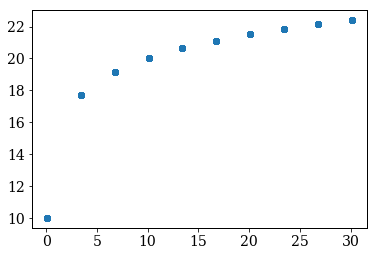

In [227]:
noSteps = 10
#b = [0]
b = np.linspace(-90.,90,noSteps)
l = np.linspace(0., 360., noSteps)
radialDistance = np.linspace(0.1,30.1,noSteps)

dist = []
coords = []
mag = []
finalResult = []

magrange = np.linspace(13,22,20)
resultList = []
for x,angle in enumerate(l):
    resultPerB = []
    for lat,lattitude in enumerate(b):
        resultPerD = []
        for y,item in enumerate(radialDistance):
            width = item * np.cos(lattitude)
            thickness = item * np.sin(lattitude)
            if width < 15 and thickness < 3.5:
                result = findWeight(angle,lattitude,item,5)
                resultList.append(result)
                coords.append(result[0])
                distance = ((result[0][0]**2)+(result[0][1]**2))**0.5
                dist.append(item)
                mag.append(result[1])
    
                
                resultPerD.append(result)
        resultPerB.append(resultPerD)
    finalResult.append(resultPerB)
plt.plot(dist,mag,'o') 
plt.show()

In [230]:
spatialsum = 0
for x in range(len(resultList)):
    spatialsum += resultList[x][5]
normalisation = spatialsum/len(result)
print(normalisation)

for x in range(len(resultList)):
    resultList[x][5] = resultList[x][5]/normalisation

1.14467656904


In [127]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*4
    for z in range(1,len(sigLevels[strat])):
        siglist = []
        for x in range(20):
            sigval = 0.
            for y in range(20):
                sigval += sigLevels[strat][z][y][x]
                #print(sigval,y)
            sigval = sigval/(y+1)
            siglist.append(sigval)
        newav[z-1] = siglist
    averageSigLevels.append(newav)

#print(averageSigLevels)

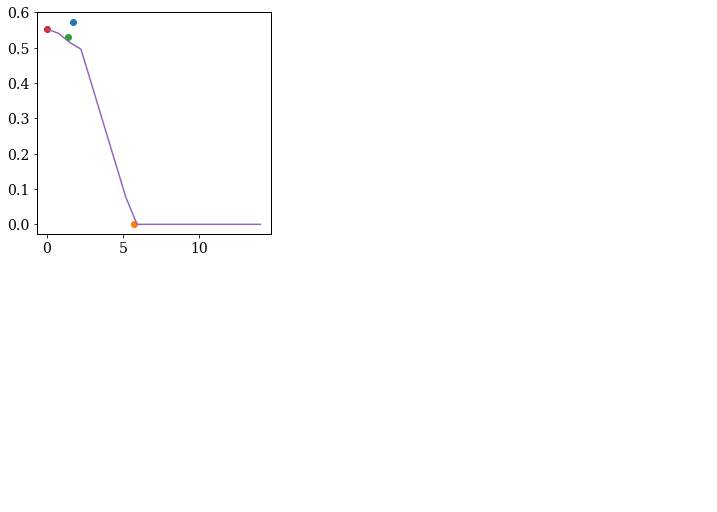

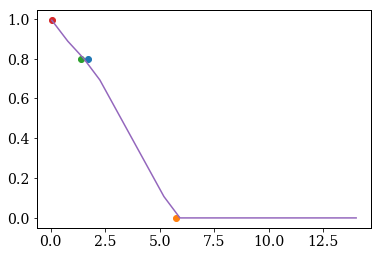

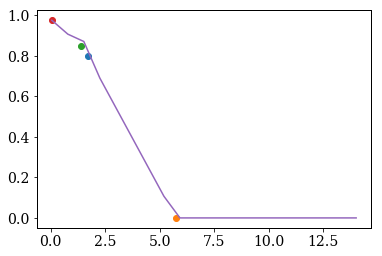

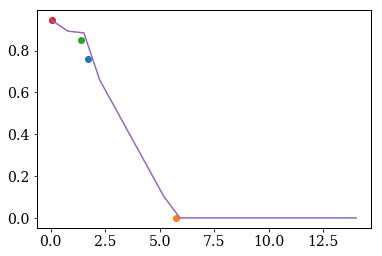

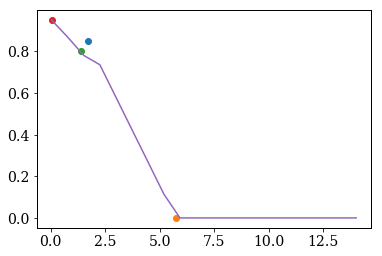

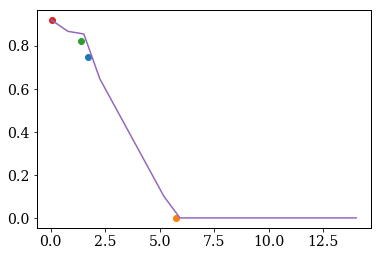

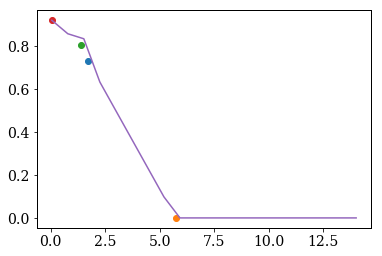

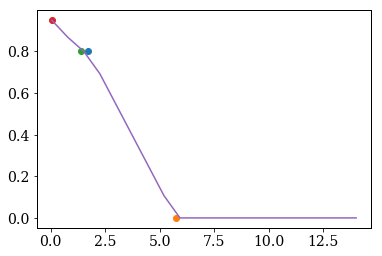

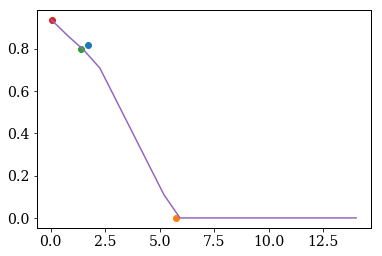

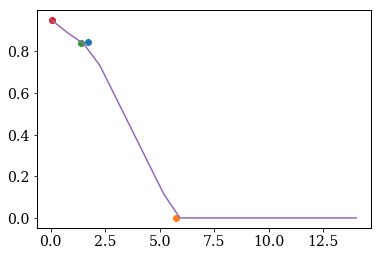

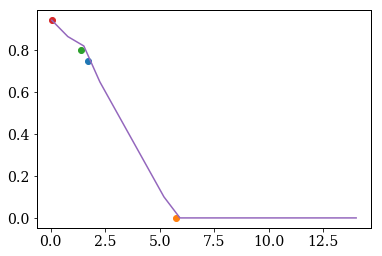

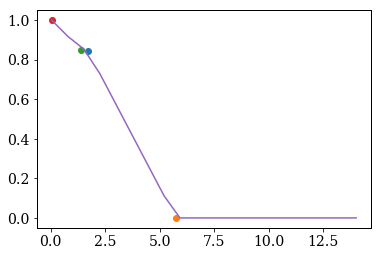

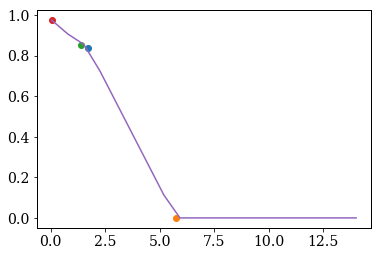

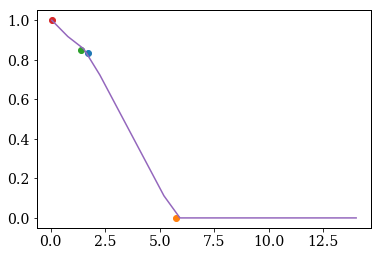

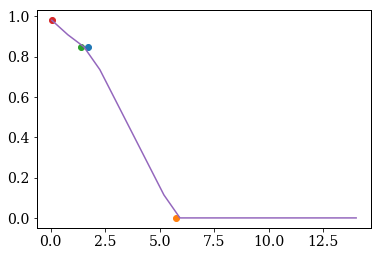

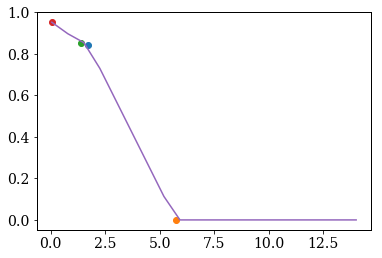

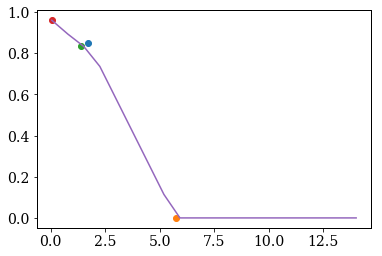

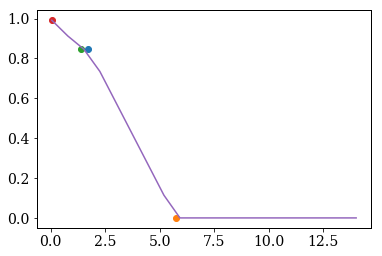

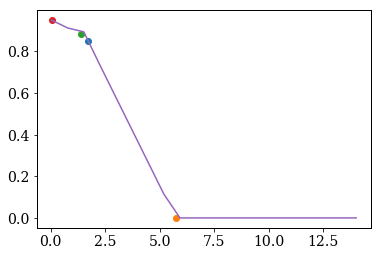

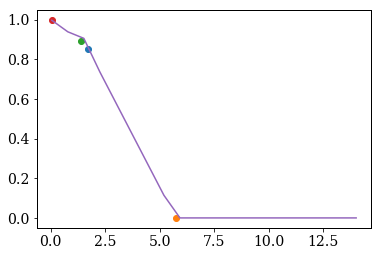

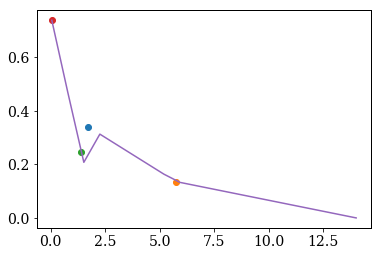

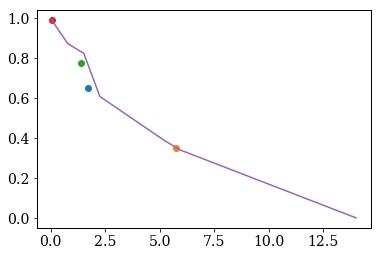

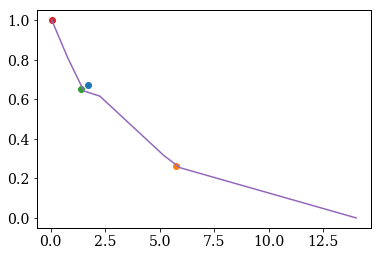

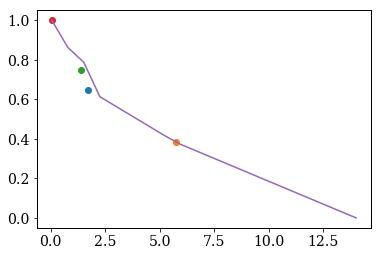

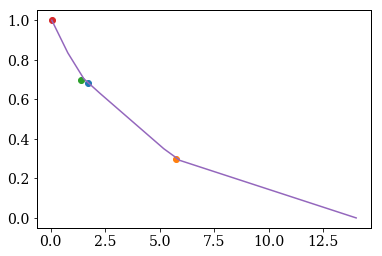

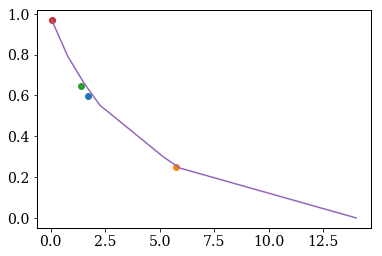

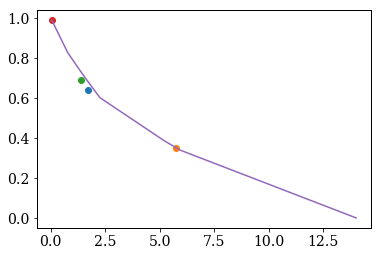

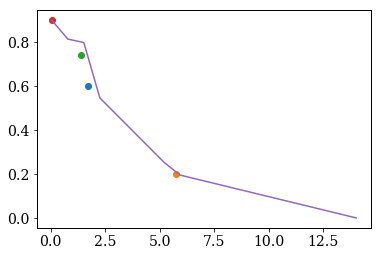

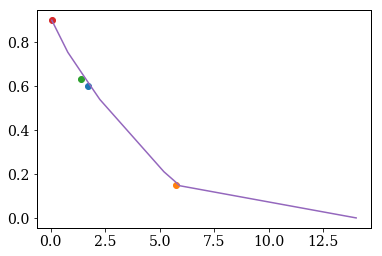

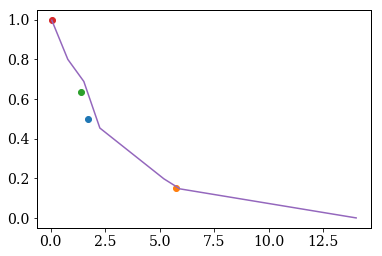

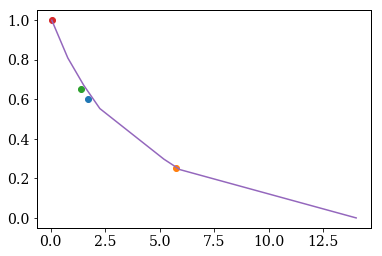

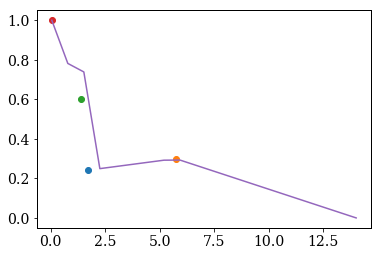

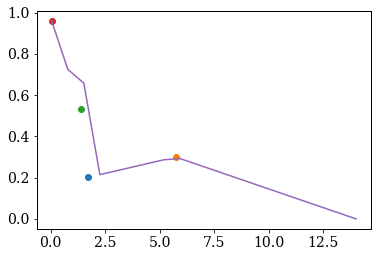

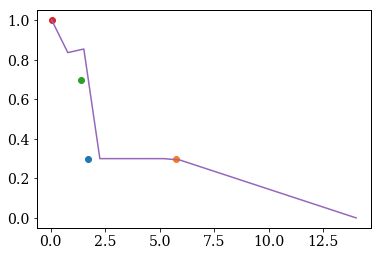

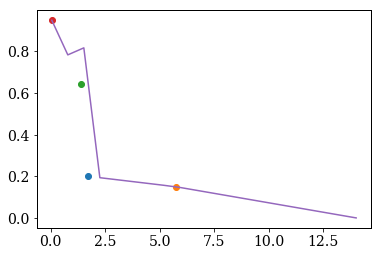

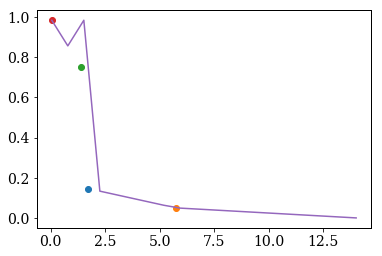

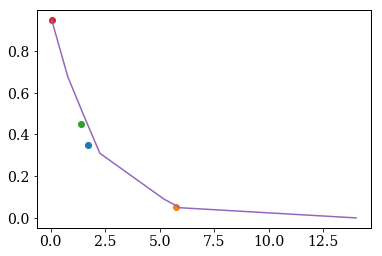

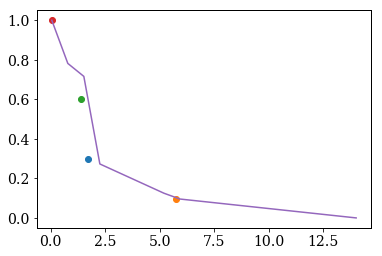

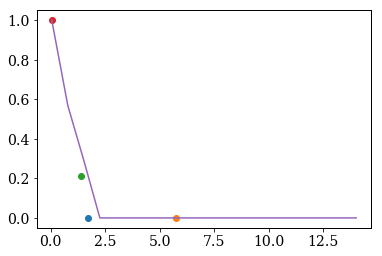

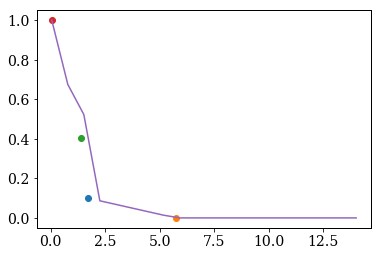

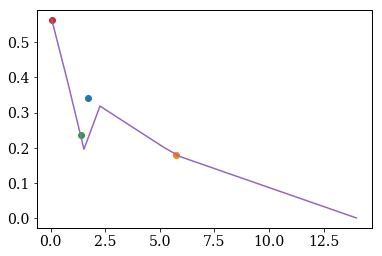

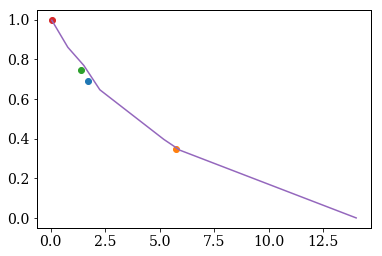

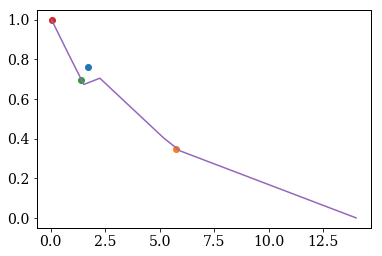

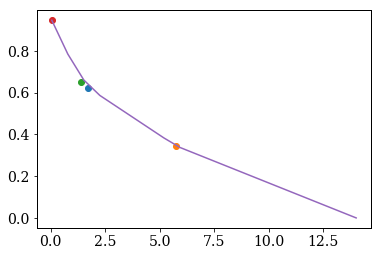

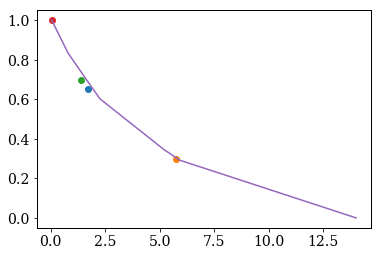

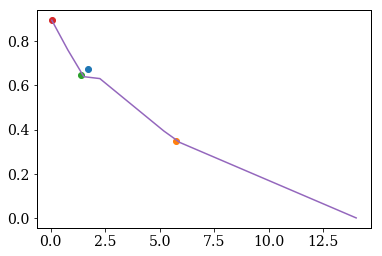

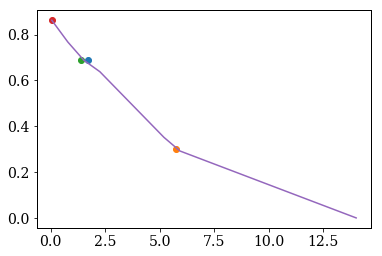

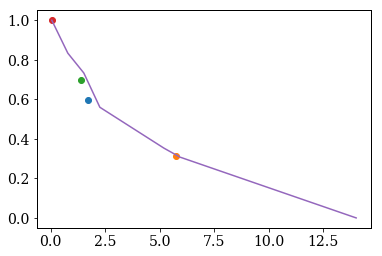

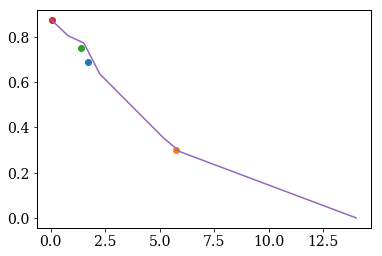

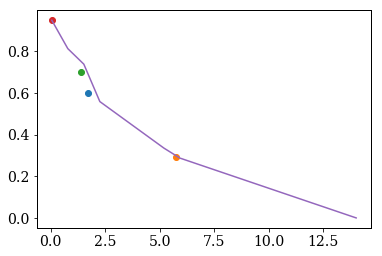

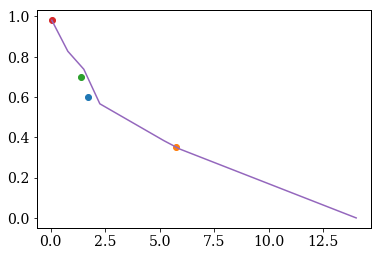

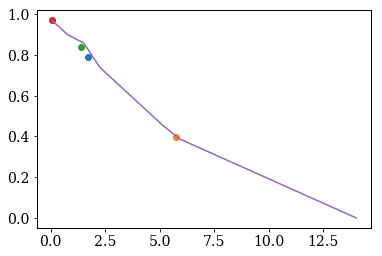

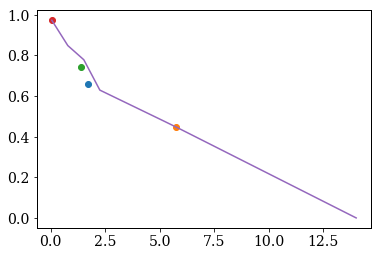

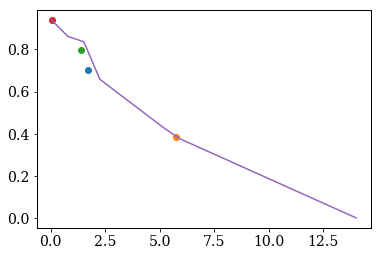

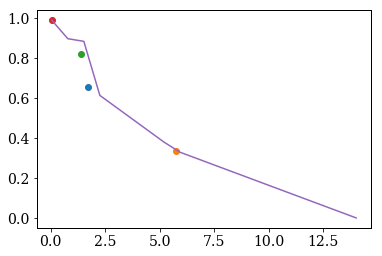

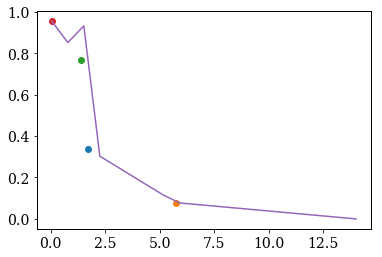

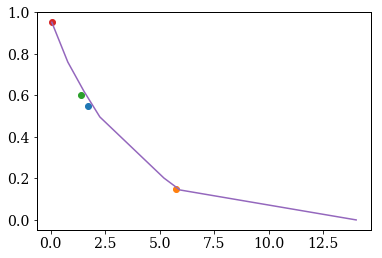

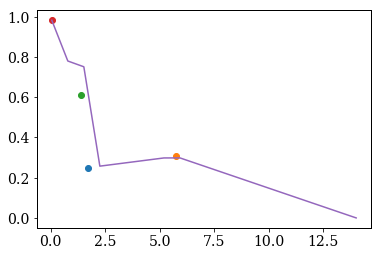

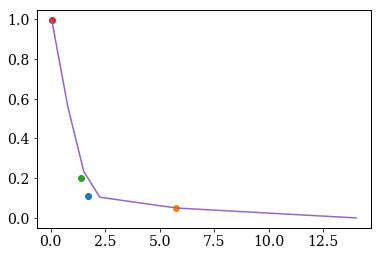

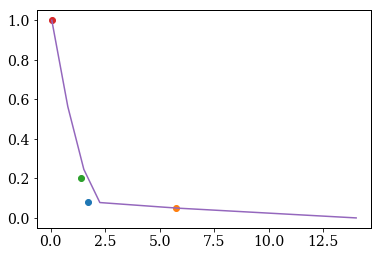

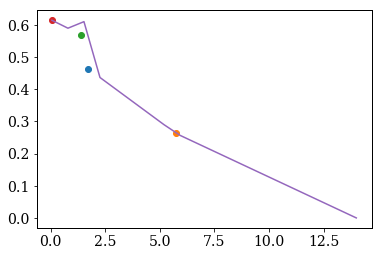

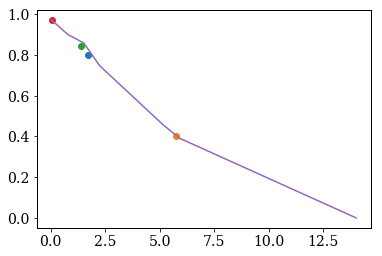

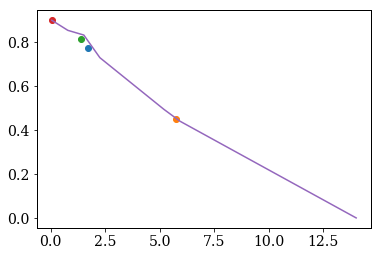

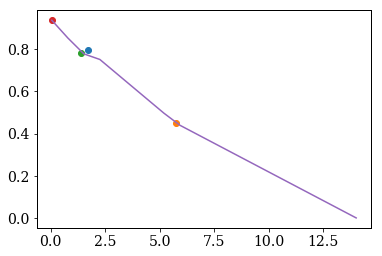

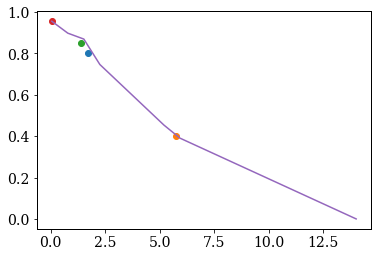

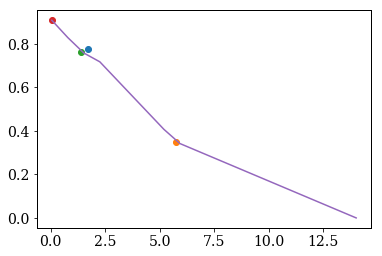

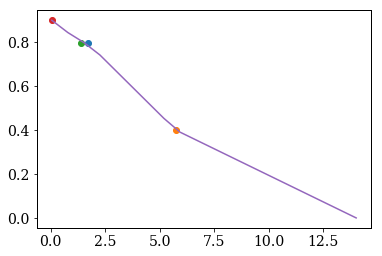

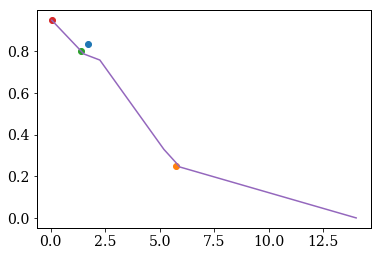

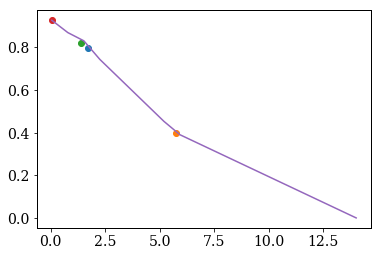

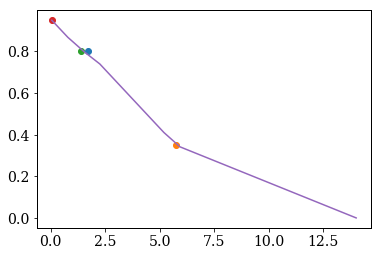

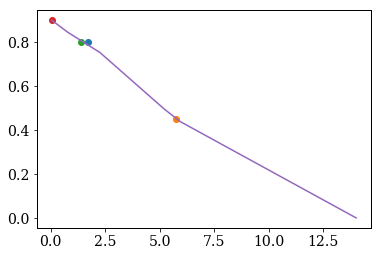

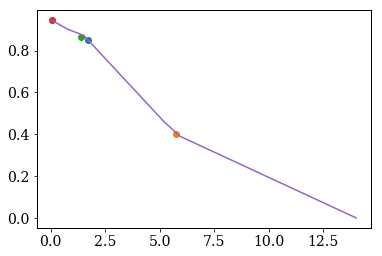

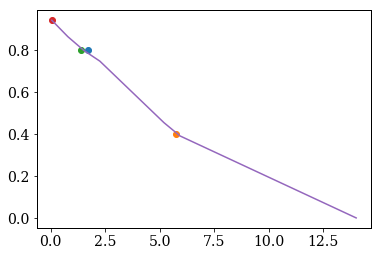

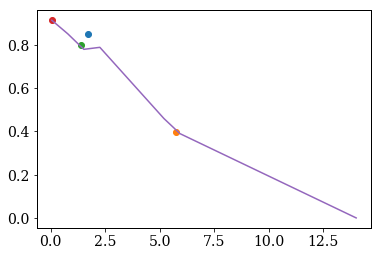

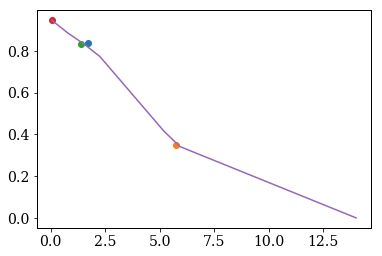

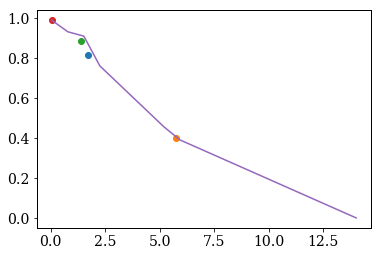

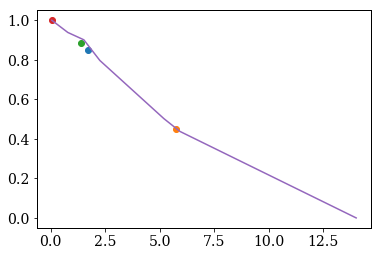

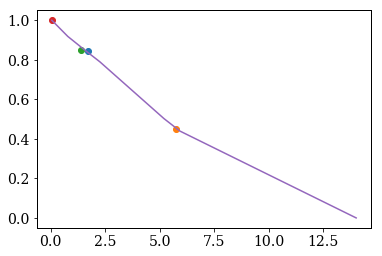

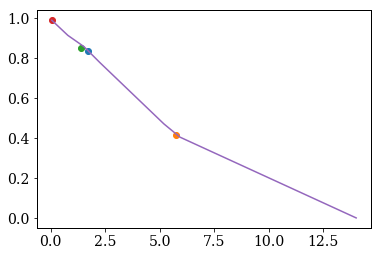

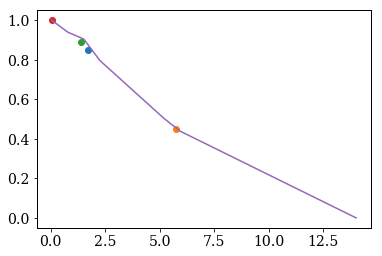

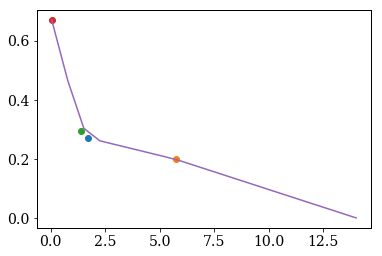

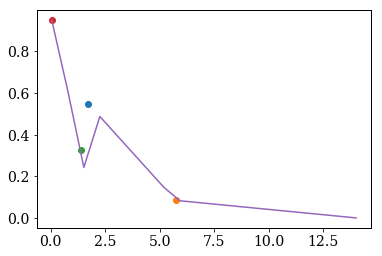

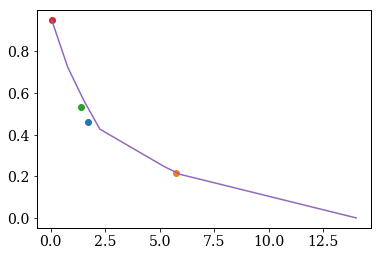

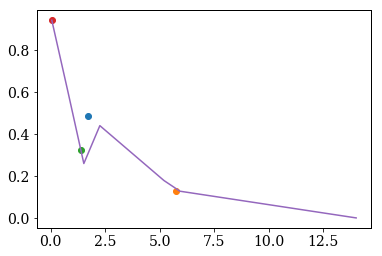

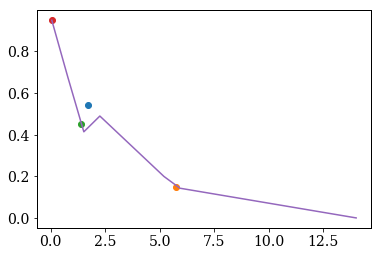

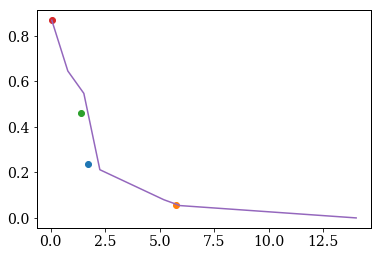

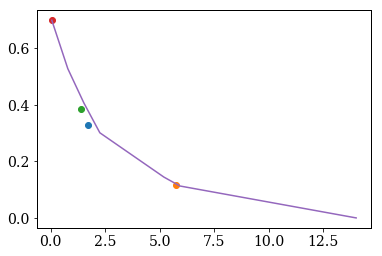

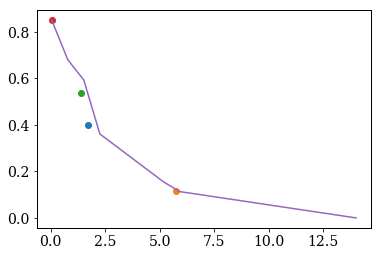

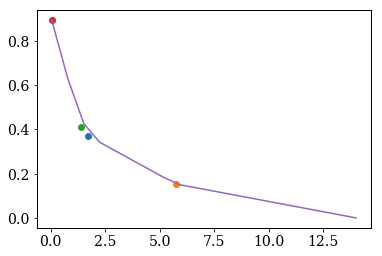

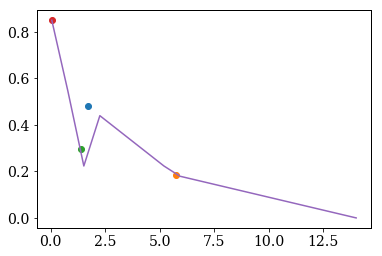

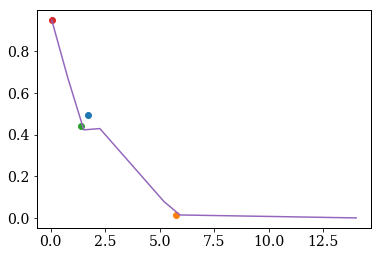

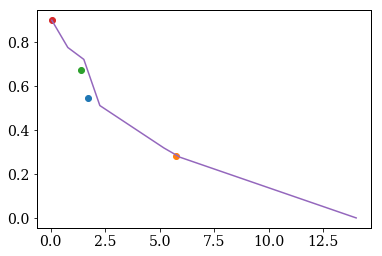

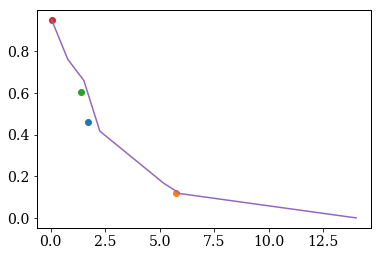

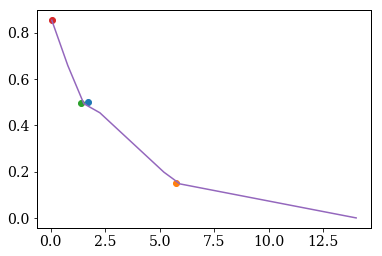

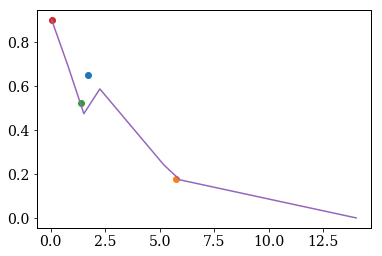

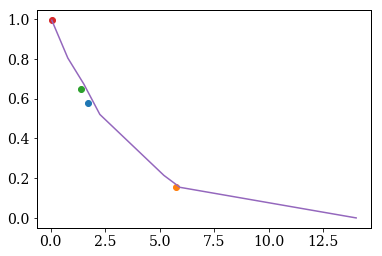

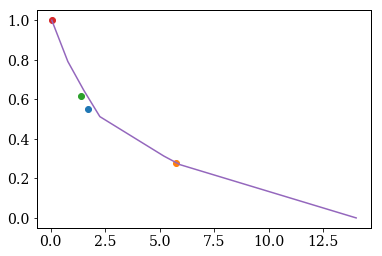

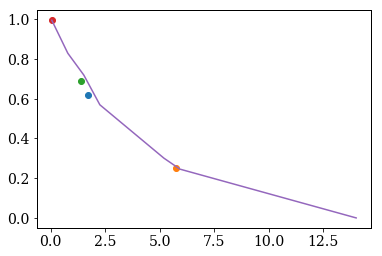

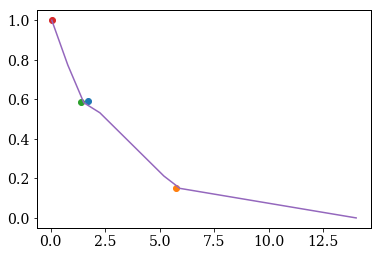

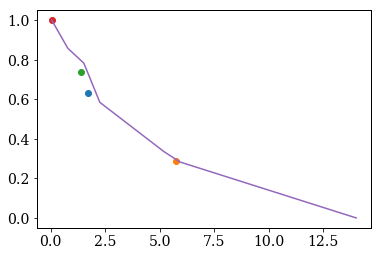

In [131]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]

reddening = np.linspace(0.054,14,20)

fullSigLevelsRedPeriod = []
fullSigRedPeriod = []

for strat in range(len(averageSigLevels)):
    astrosigLevel = averageSigLevels[strat]
    reformat = [[]]*len(reddening)
    finalsig = []
    for i,item in enumerate(reddening):
        sig = []
        if item >= Ar[3] and item < Ar[2]:
            Y = [a-b for a,b in zip(astrosigLevel[2],astrosigLevel[3])]
            X = Ar[2]-Ar[3]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3],m)]
        elif item >= Ar[2] and item < Ar[0]:
            Y = [a-b for a,b in zip(astrosigLevel[0],astrosigLevel[2])]
            X = Ar[2]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2],m)]
        elif item >= Ar[0] and item < Ar[1]:
            Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[0])]
            X = Ar[1]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0],m)]
        elif item >= Ar[1]:
            Y = [-x for x in astrosigLevel[1]]
            X = 14-Ar[1]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1],m)]
        #print(sig)
        for cycle in range(len(sig)):
            if sig[cycle] < 0.:
                sig[cycle] = 0.
        #print(sig)
    #     if len(sig) != 20:
    #         print 'whoa now'
    #     for z in range(len(sig)):
    #         reformat[z][i] = sig[z]

        finalsig.append(sig)
    fullSigLevelsRedPeriod.append(finalsig)
    reformat = []
    for x in range(len(finalsig)):
        newsig = []
        for y in range(len(finalsig[x])):
            newsig.append(finalsig[y][x])
        reformat.append(newsig)
    fullSigRedPeriod.append(reformat)
    for x in range((20)):
        for y in range(len(astrosigLevel)):
            plt.plot(Ar[y],astrosigLevel[y][x],'o')
        plt.plot(reddening,reformat[x])
        plt.show()

In [149]:
fullRed = []
for i,item in enumerate(reddening):
    fullRed.append([item]*20)
#print(fullRed)

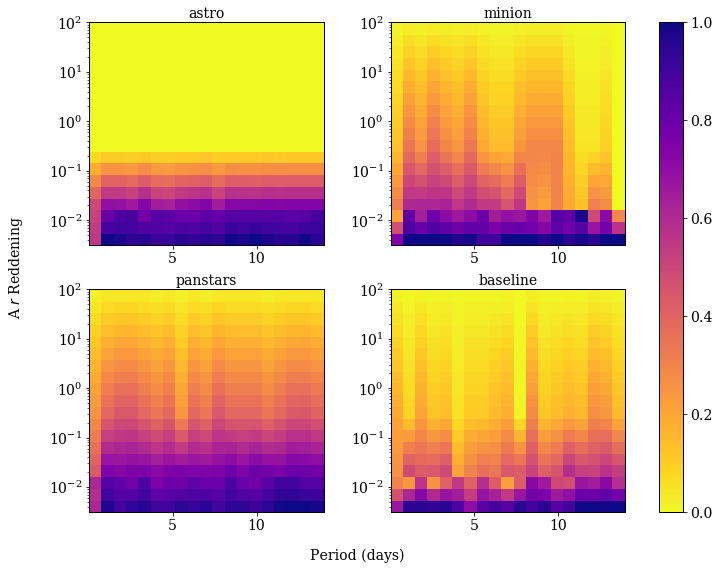

In [152]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullRed,fullPeriod,fullSigRedPeriod[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullRed,fullPeriod,fullSigRedPeriod[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullRed,fullPeriod,fullSigRedPeriod[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullRed,fullPeriod,fullSigRedPeriod[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

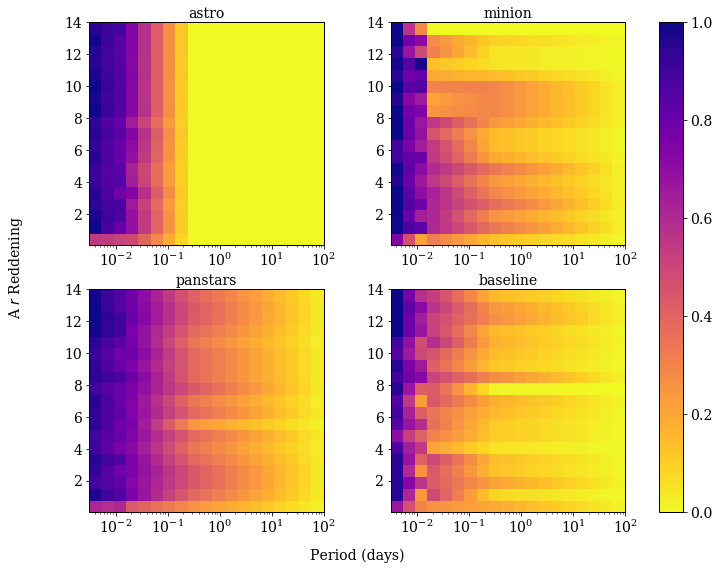

In [153]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullPeriod,fullRed,fullSigRedPeriod[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_xscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullPeriod,fullRed,fullSigRedPeriod[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_xscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullPeriod,fullRed,fullSigRedPeriod[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_xscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullPeriod,fullRed,fullSigRedPeriod[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_xscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [90]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,averageSigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,averageSigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,averageSigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,averageSigLevels[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

TypeError: Dimensions of C (4, 20) are incompatible with X (20) and/or Y (20); see help(pcolor)

In [104]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*20
    for x in range(20):
        siglist = []
        for y in range(20):
            sigval = 0.
            for z in range(1,len(sigLevels[strat])):
                sigval += sigLevels[strat][z][x][y]

            sigval = sigval/(z)
            siglist.append(sigval)
        newav[x] = siglist
    averageSigLevels.append(newav)


In [105]:
fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,sigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro_1304',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,sigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('astro_152',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,sigLevels[2],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('astro_630',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,sigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('astro_169',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

ValueError: too many values to unpack

In [ ]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,averageSigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,averageSigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,averageSigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,averageSigLevels[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
magSigs = [fullSigLevelAstro,fullSigLevelMinion,fullSigLevelMinionObsChange,fullSigLevelPanstars]

#fakeaxis=fig.add_subplot(gs[:,20])


In [ ]:
fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,fullSigLevelAstro,cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro_sim_01_1004',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,fullSigLevelPanstars,cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('Minion_1020',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,fullSigLevelMinionObsChange,cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('Minion_1016j',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,fullSigLevelMinion,cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('Minion_1016',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()